
<img style="float: left; width: 370px; height:200px" src="images/pha.jpg">


## <font color="grey"> Cytokine responses to viruses and bacteria at the population level</font>

---

### Lijing Lin, June 2022

<p>
 <font color="grey">
<small>
<p> Analyses here are for the paper:  <i> A systems immunology approach to describe the architecture of cytokine responses to viruses and bacteria at the population level. </i>


</p></small>


***




Data used here is generated from MATLAB files: 
* ``data/dataPreprocessing_new.m``
* ``../MATLABcodes/missImputePPCA.m``


# Notebook setup

In [2]:
from lib import *


%matplotlib inline
%config InlineBackend.figure_format = 'retina'#'svg'
matplotlib.rcParams['figure.figsize'] =  (8,5)
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['font.family'] = 'sans-serif'


# To supress FutureWarning: 
# Panel is deprecated and will be removed in a future version.
# The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
# Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
# Pandas provides a `.to_xarray()` method to help automate this conversion.

#   import sys

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


System info:
3.8.8 (default, Apr 13 2021, 12:59:45) 
[Clang 10.0.0 ]
IPython version is (7, 29, 0, '')
Package Versions:
  scikit-learn: 0.24.1
  scipy: 1.6.2
  statsmodels: 0.12.2
  Numpy: 1.19.5
  Seaborn: 0.11.1
  Pandas: 1.2.4


In [3]:
import datetime
import os
now = datetime.datetime.now().strftime("%Y-%m-%d-%H")
cwd = os.getcwd()
OutputDir = cwd + '/paper1Output_' + now + '/'

print('Output Dir: %s' % OutputDir)

if not os.path.exists(OutputDir):
    os.makedirs(OutputDir)

Output Dir: /Users/mbbxgll2/FLS/Project/code/BioInf_Github/Systems-Immunology-Cytokine-Responses/paper1Output_2022-06-28-00/


In [4]:
# # read from matlab file
# mycolor = scipy.io.loadmat('mycolor50.mat') 
# mycolor = mycolor['mycolor50']
# mycolor = mycolor.tolist()[0][-1].tolist() # make it a proper list


# or use the following list directly
mycolor = ['#0000FF', '#FF0000', '#00FF00', '#00002C', '#FF1AB9', '#FFD300',
           '#005800', '#8484FF', '#9E4F46', '#00FFC1', '#008495', '#00007B',
           '#95D34F', '#F69EDC', '#D312FF', '#7B1A6A', '#F61261', '#FFC184',
           '#232309', '#8DA77B', '#F68409', '#847200', '#72F6FF', '#9EC1FF',
           '#72617B', '#9E0000', '#004FFF', '#004695', '#D3FF00', '#B94FD3',
           '#3E001A', '#EDFFB0', '#FF7B61', '#46FF7B', '#12A761', '#D3A7A7',
           '#D34F84', '#6A00C1', '#2C6146', '#0095F6', '#093E4F', '#A75809',
           '#72613E', '#099500', '#9E6AB9', '#FFFF72', '#A7F6CA', '#95B0B9',
           '#B0B009', '#2C004F']

mycolor.remove(mycolor[3])  # remove black
mycolor.remove(mycolor[-5])  # remove light yellow


In [44]:
from importlib import reload
import lib.loadData as loadData
reload(loadData)
# data folder
dataDir = os.path.abspath('data')

cytolabel,stimlabel = loadData.load_labels(dataDir)
meanFold = loadData.load_meanFoldChange(dataDir)

datapanel_raw, datapanel_raw_nrm, datapanel_raw_log, datapanel_nrm, datapanel_log  =  \
                                            loadData.load_cytokine(dataDir,batch_adjust=False)
print('cytokine labels: \n' + ', '.join(cytolabel) + '\n')
print('stimulus labels: \n' + ', '.join(stimlabel) + '\n')


cytokine labels: 
IFN-alpha2, IFN-beta, IFN-gamma, IFN-lambda1(IL-29), TNF, IL-1beta, IL-2, IL-4, IL-5, IL-6, IL-8(CXCL8), IL-10, IL-12p70, IL-13, IL-15, IL-16, IL-17, IL-18, IL-25, IL-33, Eotaxin-1(CCL11), Eotaxin-3(CCL26), IP-10(CXCL10), MIP1beta(CCL4), MCP1(CCL2), MCP4(CCL13), MDC(CCL22), TARC(CCL17)

stimulus labels: 
media, RSV, RV1B, RV16, polyIC, R848, CpGA, Strpn, LTA, Hin, LPS, PHA, PAM, PGN, FSL, Fla



# Load Data
---
We have two main types of data: raw data (log2 transformed) and missing-imputed data. For each type of data, we generate two data sets: one leaving media as independent variable (varibles with suffix _log) and the other one with data normalised by media (varibles ended _nrm), i.e., subtracting log-media from log-response. Therefore we ended up with five data variables:

* ``Year11_rawData_coded``: raw data with batch effect removed 28*307*16
* ``Year11_imputedData_mediaNormalised_coded.xlsx``: media normalised data with missing data imputed 
* ``Year11_nonImputed_mediaNormalised_coded.xlsx``: media normalised data without missing data imputed 

In [205]:
dataRaw = pd.read_excel('data/Year11_rawData_coded.xlsx',index_col = 0, header=[0,1])
dataRawNrm = pd.read_excel('data/Year11_nonImputed_mediaNormalised_coded.xlsx',index_col = 0, header=[0,1])
dataImp = pd.read_excel('data/Year11_imputedData_mediaNormalised_coded.xlsx',index_col = 0, header=[0,1])
 
dataRaw.drop('polyIC',axis=1,level=1,inplace=True)

In [52]:
# from lib import loadData
# meanFold = loadData.load_meanFoldChange(dataDir)

In [61]:
 

cytolabel = dataAll.columns.get_level_values(0).unique()
stimlabel = dataAll.columns.get_level_values(1).unique()

 
print('cytokine labels: \n' + ', '.join(cytolabel) + '\n')
print('stimulus labels: \n' + ', '.join(stimlabel) + '\n')


cytokine labels: 
IFN-alpha2, IFN-beta, IFN-gamma, IFN-lambda1(IL-29), TNF, IL-1beta, IL-2, IL-4, IL-5, IL-6, IL-8(CXCL8), IL-10, IL-12p70, IL-13, IL-15, IL-16, IL-17, IL-18, IL-25, IL-33, Eotaxin-1(CCL11), Eotaxin-3(CCL26), IP-10(CXCL10), MIP1beta(CCL4), MCP1(CCL2), MCP4(CCL13), MDC(CCL22), TARC(CCL17)

stimulus labels: 
RSV, RV1B, RV16, R848, CpGA, Strpn, LTA, Hin, LPS, PHA, PAM, PGN, FSL, Fla



## Descriptive statistics

### Compute the robust mean fold change for each cytokine stimulus pairs

In [230]:
from scipy.stats import iqr
def robustMeanFold(col,kind ='arith'):  # col is log Fold change: log(m/n) return mean m/n
    x = col.copy()    
    w = 2
    iqrng = iqr(x, rng=(25, 75), scale=1, nan_policy='omit') 
    q75 = np.nanpercentile(x,75)  
    q25 = np.nanpercentile(x,25)
    lb = q25 - w*iqrng
    ub = q75 + w*iqrng
    x[x<lb] = np.nan
    x[x>ub] = np.nan
    if kind =='geom':
        return np.power(2,np.nanmean(x))     # geometric mean fold change
    else:
        return np.nanmean(np.power(2,x))   # arithmatic mean fold change
    

In [231]:
RobMeanFold = dataRawNrm.apply(robustMeanFold,kind='geom')
RobMeanFold.name = 'RobustMeanFoldChange'

RobMeanFold = RobMeanFold.unstack(1).applymap(np.round).astype(int).loc[cytolabel,stimlabel]

In [232]:
RobMeanFold.head()

stimulus            RSV  RV1B  RV16  R848  CpGA  Strpn  LTA  Hin  LPS  PHA  \
cytokine                                                                     
IFN-alpha2          184     8    63    23   178      1    1    1    1    1   
IFN-beta              2     1     1     1     1      1    1    3    1    1   
IFN-gamma            11     6    13     4     2      2    3  123    8  126   
IFN-lambda1(IL-29)    1     1     1     1     1      1    1    1    1    1   
TNF                   2     2     3     9     1      7   34   32   28   16   

stimulus            PAM  PGN  FSL  Fla  
cytokine                                
IFN-alpha2            1    1    1    1  
IFN-beta              1    1    1    1  
IFN-gamma             2    6    2    4  
IFN-lambda1(IL-29)    1    1    1    1  
TNF                  12   25    7   25

In [233]:
meanFold = RobMeanFold.copy()

### Find the id for children with complete data, i.e., no missing measurements

In [174]:
# total number of children having no missing data
comp_index = np.isnan(dataRaw).sum(axis = 1) == 0
print('Counts of children with complete data: %d' % sum(comp_index))

id_comp = comp_index[comp_index==True].index.values



Counts of children with complete data: 130


### Raw data in boxplots
---
We check opulation characteristics and response distributions here. Firstly, we plot cytokine by cytokine. As we are plotting raw data which has wide range across different stimuli, we may need to pick up responses of the stimuli that have much higher responses and plot those with second y-axis. This list is recorded in ``list_sec`` in the following codes. We now show an example for ``IFN-alpha2``.

#### IFN-alpha2


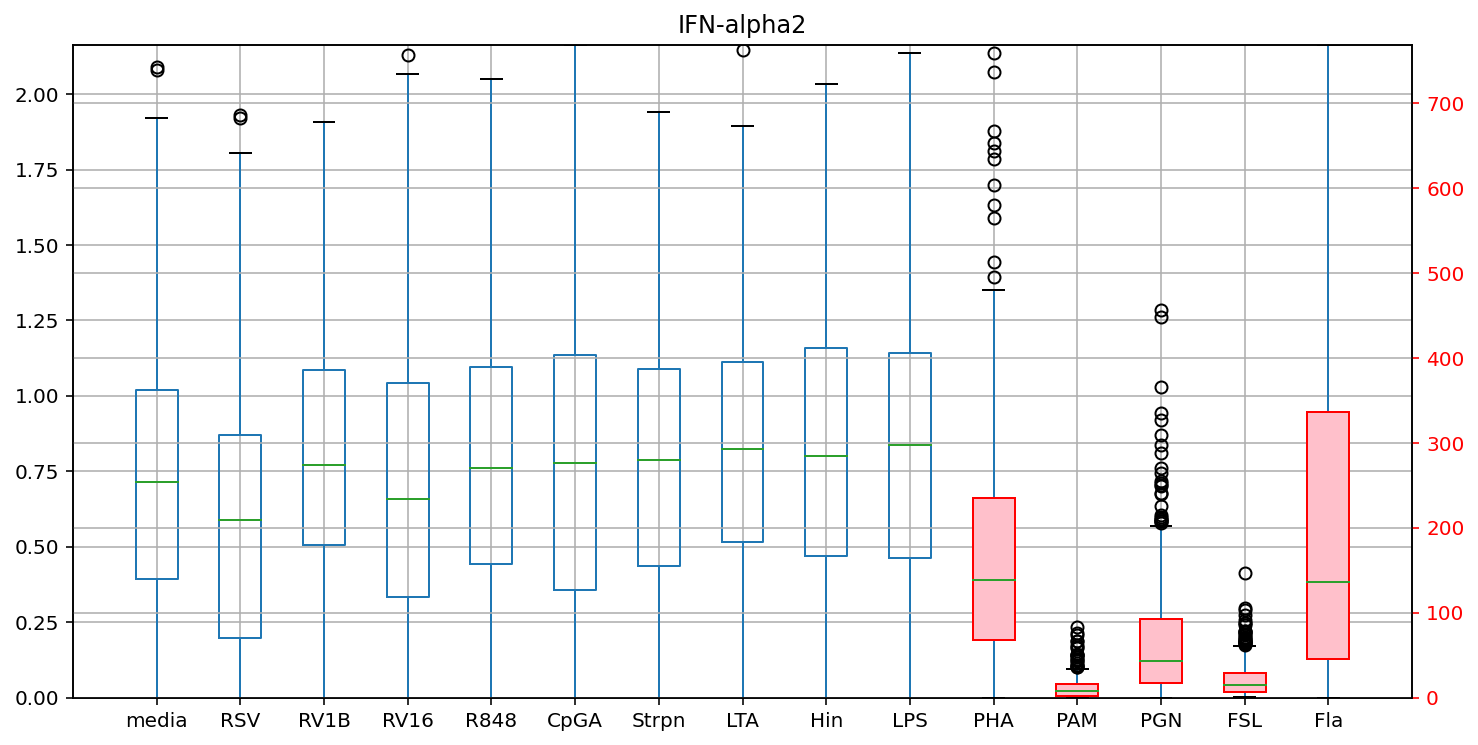

In [204]:
 
cyto = 'IFN-alpha2'
df = dataRaw.xs(cyto,axis=1,level=0)



list_sec = ['RSV','RV1B','RV16','R848','CpGA']
df1 = df.copy()
df1.drop(list_sec,axis=1,inplace=True)

fig, ax = plt.subplots(1,1,figsize=(12,6))
boxes = df1.boxplot( ax=ax,return_type='dict')

ymax1 = max([item.get_ydata().max() for item in  boxes['whiskers']])




boxcol = 'red'
facol = 'pink'
ax2 = ax.twinx()
df2 = df[list_sec] 
boxes = df2.boxplot(ax=ax2,
                    positions = range(df1.shape[1]+1,df.shape[1]+1),
                   patch_artist=True,return_type='dict')  # default pos start from 1

ymax2 = max([item.get_ydata().max() for item in  boxes['whiskers']])


for patch in boxes['boxes']:
    patch.set_facecolor(facol)
    patch.set_edgecolor(boxcol)
    
# ax2.spines['right'].set_color('red')
# ax.spines['top'].set_color('red')
ax2.xaxis.label.set_color(boxcol)
ax2.tick_params(axis='y', colors=boxcol)
ylim_2 = ax2.get_ylim()


_= ax.set_xlim([0,df.shape[1]+1])
_= ax.set_ylim([0, ymax1])

_= ax2.set_ylim([0, ymax2])



_= ax.set_xticks(range(1,df.shape[1]+1))
_= ax.set_xticklabels(df.columns.values)
_= ax.set_title(cyto)
savefig(OutputDir + cyto.replace('/','') + '_BoxPlot.pdf',)  # replace to avoid / appearing in file name


# Hierarchical Clustering excluding polyIC
---
We first check imputed data so we have 307 samples.

## Figure 2


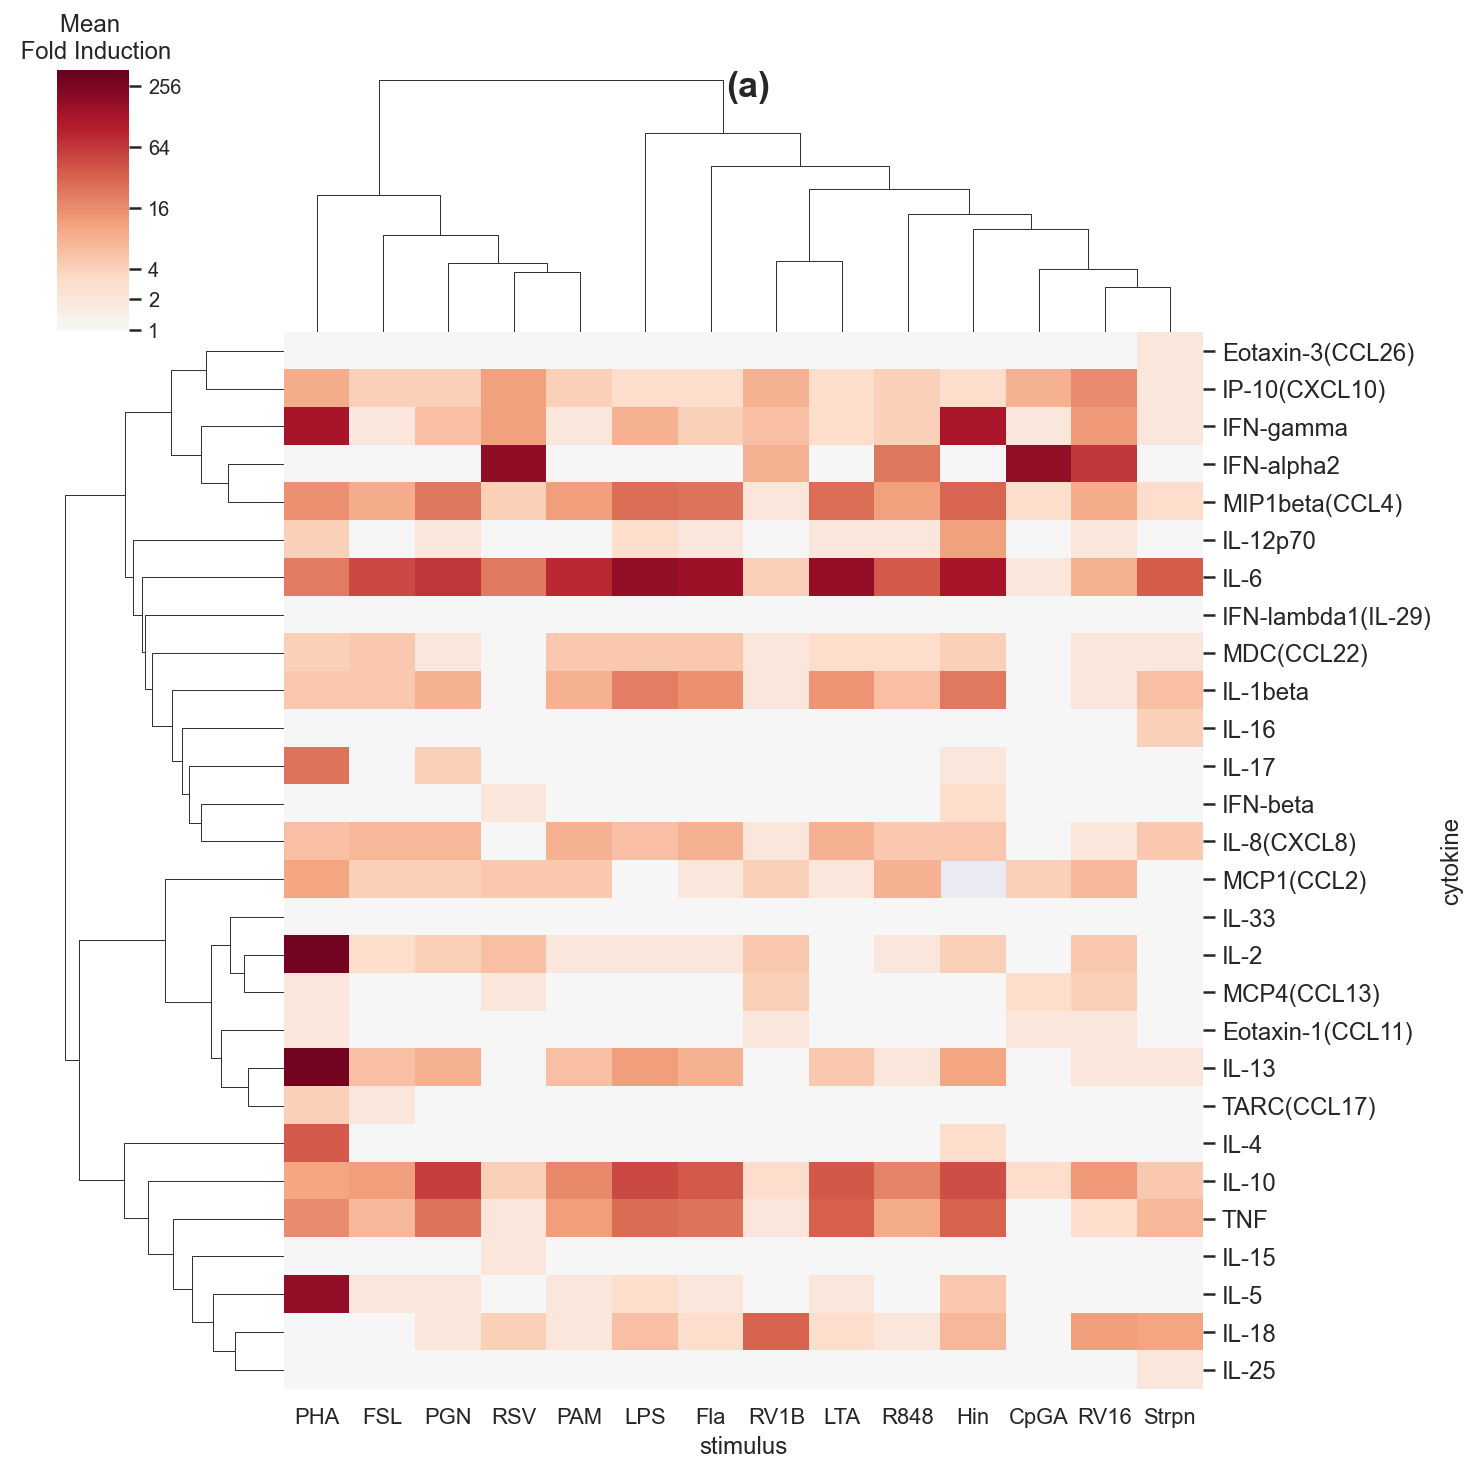

In [235]:
from lib.plot_clustermap_panel import plot_clustermap
mean_xlabel = np.log2(meanFold).copy()
cbar_ticks = [0,1,2,4,6,8]
cbar_ticklabels = np.power(2,cbar_ticks)


# mean_xlabel.columns.name = '(a)'  # add x label to indicate the figure number in the paper
plot_clustermap(dataImp,dist='c_correlation',
                mean = mean_xlabel,
                fname = OutputDir + 'Figure2.pdf',
                cbar_title = 'Mean \n Fold Induction',vmax = 8.5,vmin=0,gp=False,addlabel='(a)',
                cbar_ticks = cbar_ticks,cbar_ticklabels = cbar_ticklabels
               )


We then check samples with complete data.

## Figure S4

In [236]:
id_comp

array([  1,   3,   5,  15,  16,  18,  19,  21,  23,  24,  25,  28,  29,
        31,  33,  38,  42,  47,  48,  50,  51,  52,  53,  56,  57,  59,
        60,  61,  62,  63,  68,  71,  72,  77,  80,  81,  84,  86,  87,
        89,  90,  91,  94, 104, 106, 110, 111, 113, 114, 115, 121, 122,
       123, 125, 128, 135, 138, 139, 140, 141, 142, 144, 145, 149, 150,
       151, 152, 154, 155, 157, 161, 166, 167, 169, 170, 172, 177, 180,
       181, 184, 186, 190, 193, 200, 212, 213, 214, 218, 219, 220, 221,
       224, 229, 230, 231, 232, 238, 241, 245, 249, 250, 251, 253, 255,
       256, 257, 259, 260, 262, 263, 265, 267, 268, 271, 273, 274, 275,
       276, 279, 280, 284, 286, 288, 293, 294, 300, 301, 302, 304, 306])

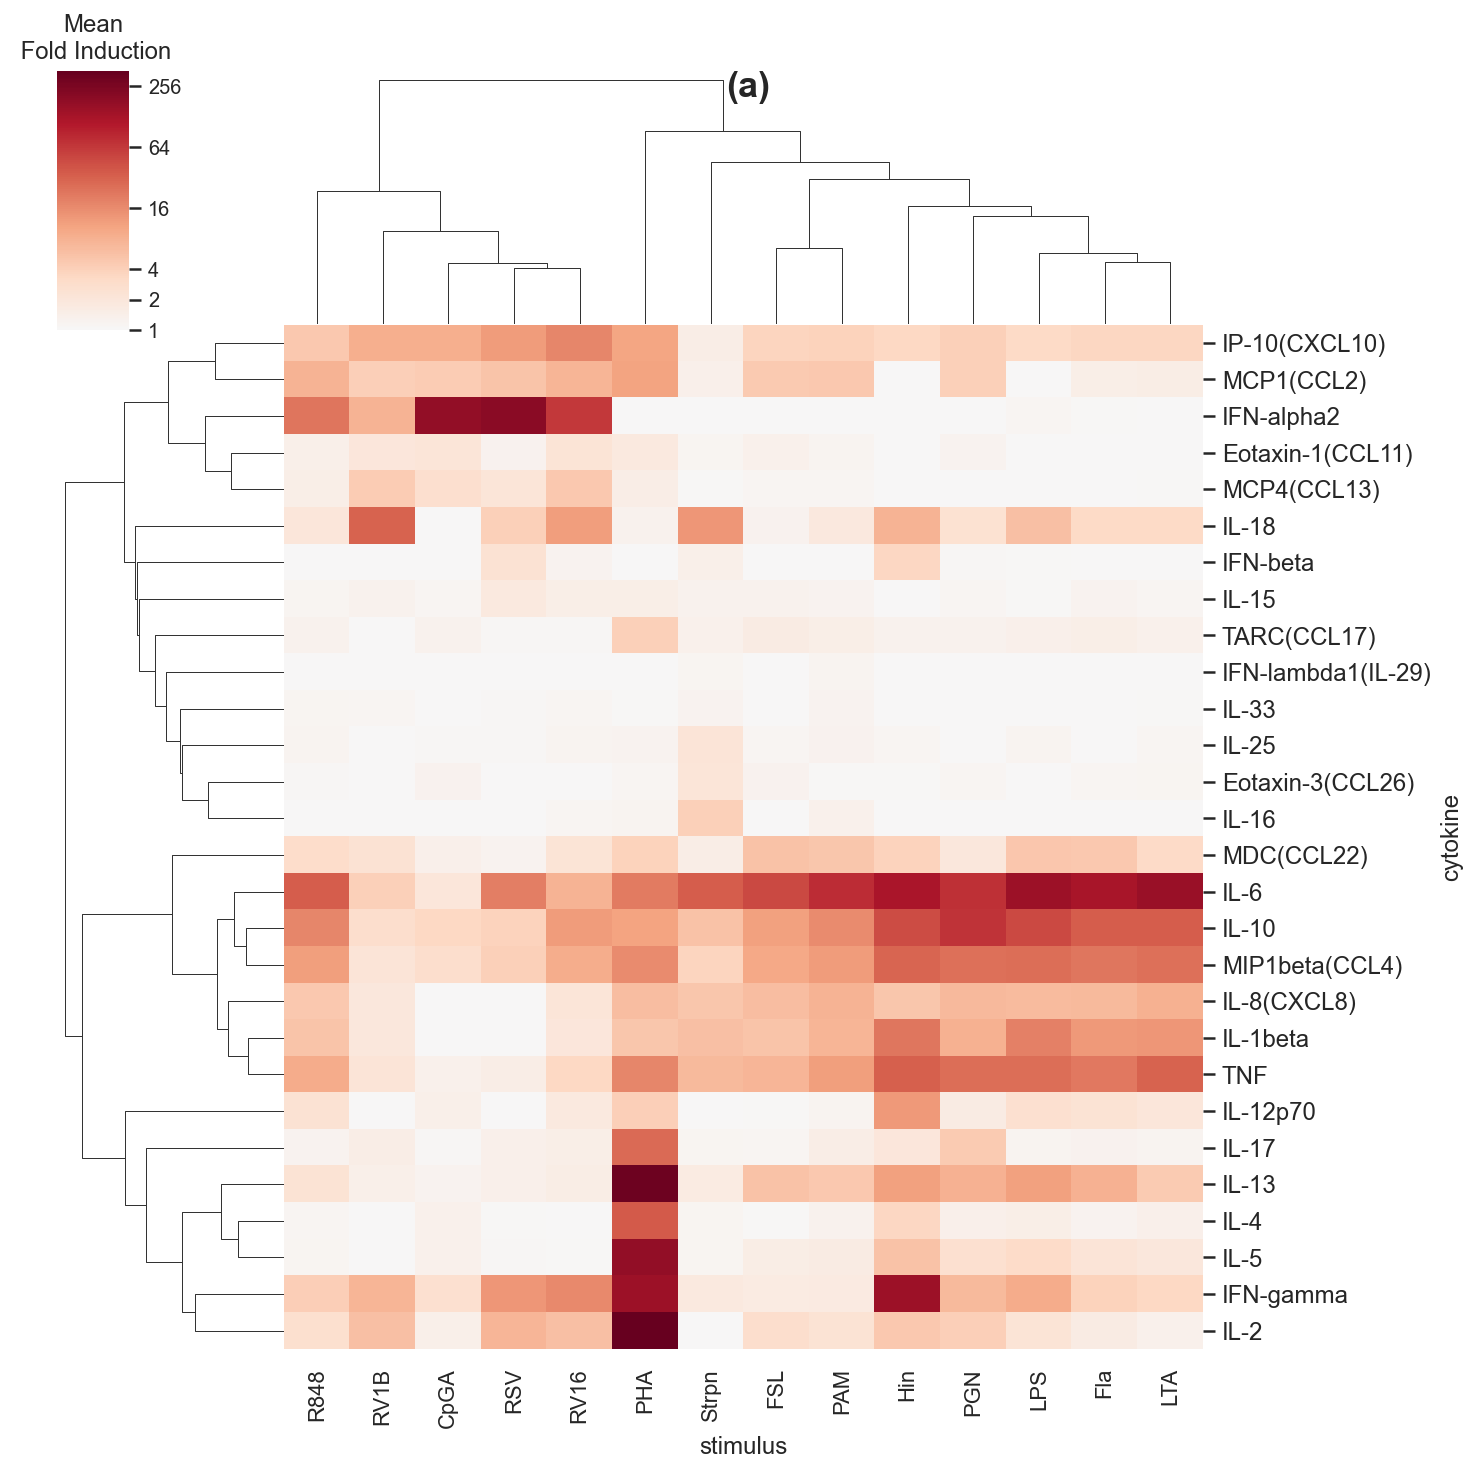

In [244]:


 
data_comp = dataImp.loc[id_comp,:]
meanComp = data_comp.mean().unstack('stimulus')
meanComp[meanComp<0] = 0
# meanComp = np.log2(meanFold).copy()
cbar_ticks = [0,1,2,4,6,8]
cbar_ticklabels = np.power(2,cbar_ticks)

plot_clustermap(data_comp,dist='c_correlation',
                mean = meanComp,
                fname= OutputDir + 'Figure_complete.pdf',
                cbar_title = 'Mean\n Fold Induction',vmax = 8.5,vmin=0,gp=False,addlabel='(a)',
                cbar_ticks = cbar_ticks,cbar_ticklabels = cbar_ticklabels
               )

## HC with media as independent variable
## Figure S5

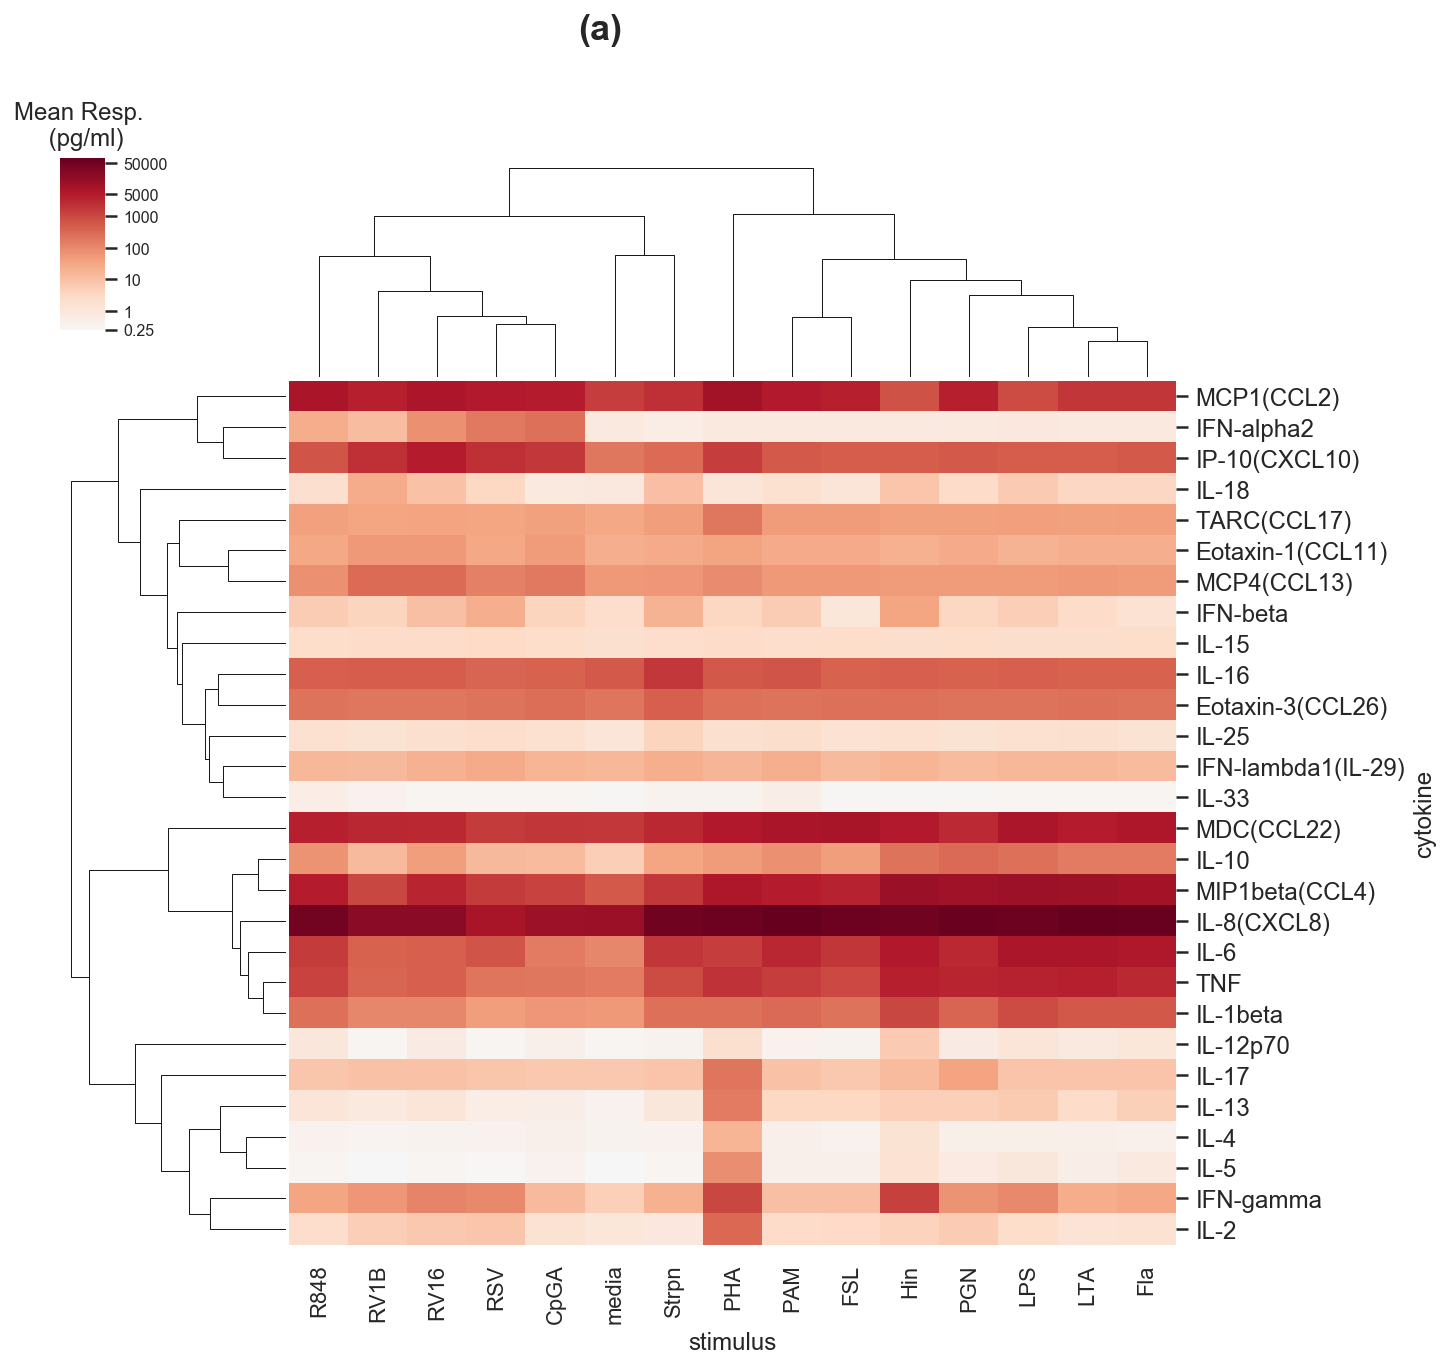

In [33]:
datapanel = datapanel_log.copy()
meanRawMedia = np.log2(datapanel_raw.mean(axis=1).T)
vmax = meanRawMedia.max().max()
vmin = meanRawMedia.min().min()

## define ticks from labels
cbar_ticklabels = [0.25, 1, 10, 100, 1000, 5000,50000]
cbar_ticks = np.log2(cbar_ticklabels)


plot_clustermap(datapanel,dist='c_correlation',
                mean = meanRawMedia,
                fname= OutputDir + 'FigureS5_media307_Jun18.pdf',
                cbar_title = 'Mean Resp. \n (pg/ml)',
                vmax = vmax,cmap = None,
                vmin=vmin,gp=False,addlabel='(a)',
                cbar_ticks = cbar_ticks, 
                cbar_ticklabels = cbar_ticklabels, cbar_labelsize=8
               )

## Figure S6
---
Same as Figure S4 but with polyIC excluded


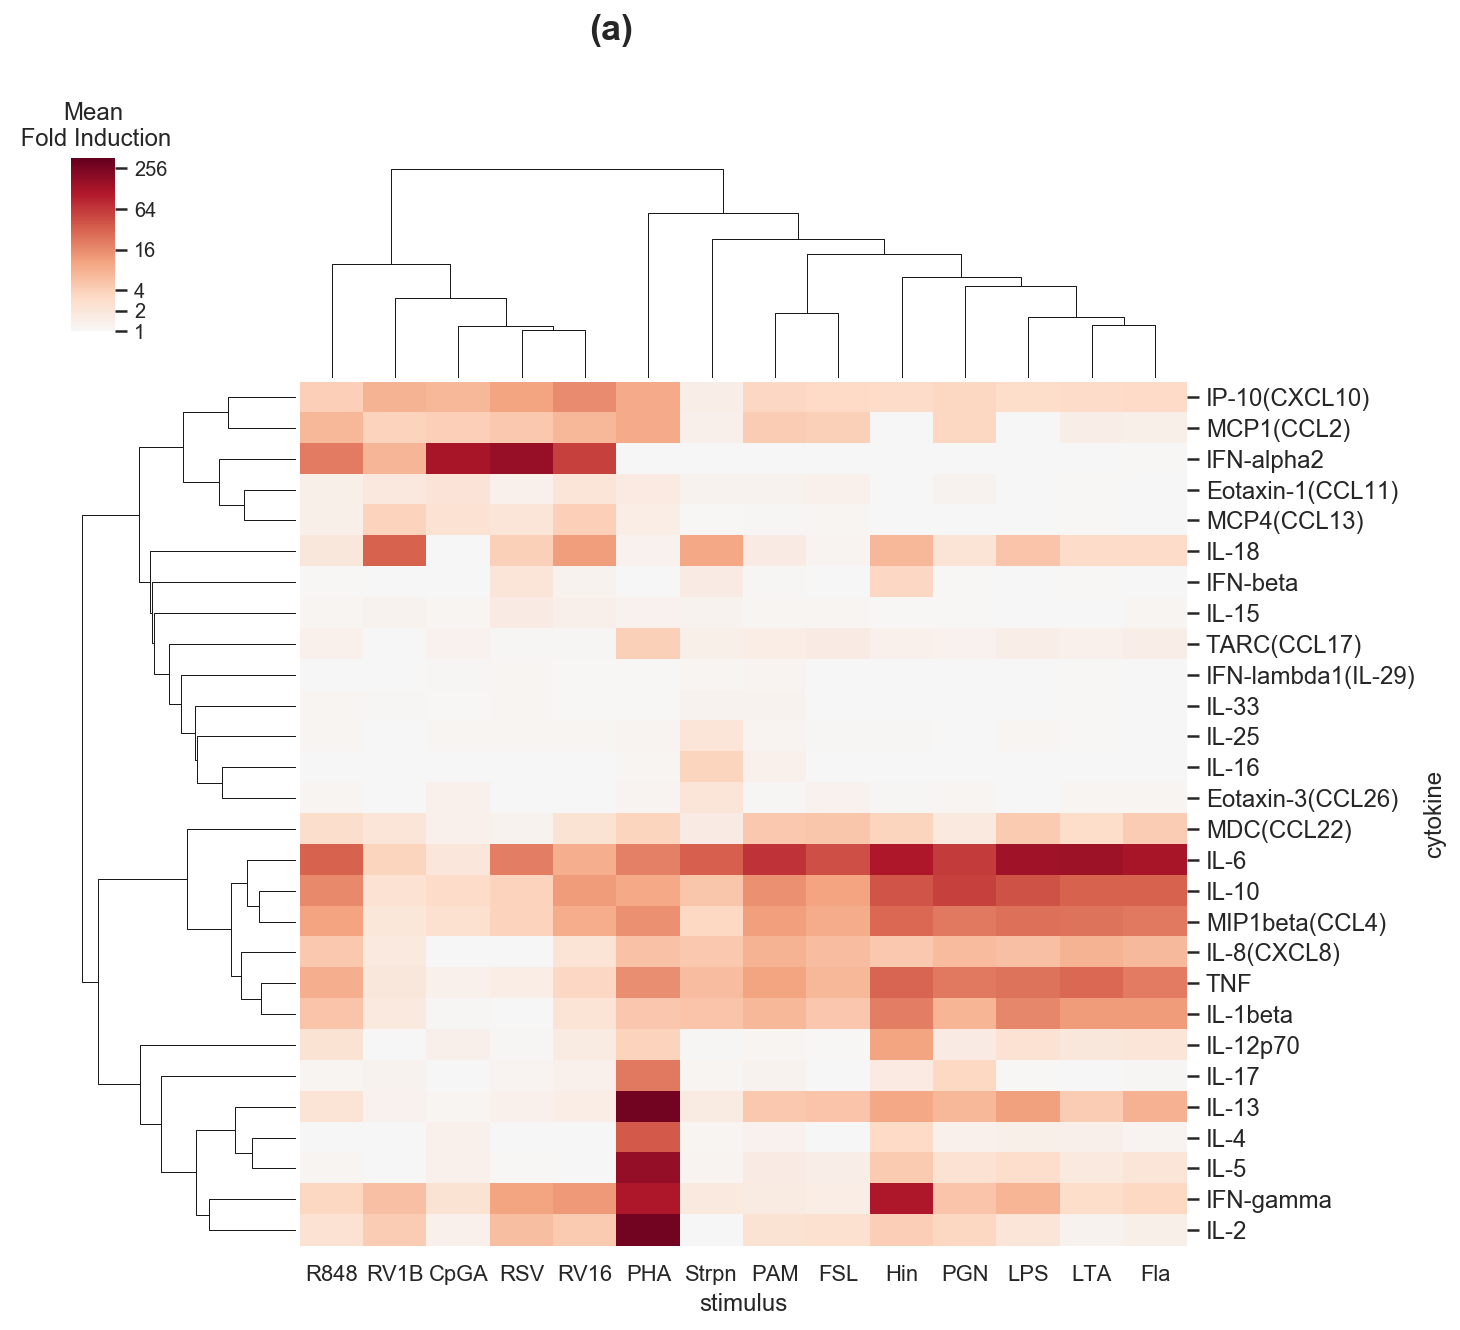

In [34]:
from lib.plot_clustermap_panel import plot_clustermap

datapanel = datapanel_nrm.copy()
datapanel_comp = datapanel.loc[:,id_comp,:]
meanComp = datapanel.mean(axis=1).T
meanComp[meanComp<0] = 0

cbar_ticks = [0,1,2,4,6,8]
cbar_ticklabels = np.power(2,cbar_ticks)

plot_clustermap(datapanel_comp,dist='c_correlation',
                mean = meanComp,
                fname= OutputDir + 'FigureS6_noPolyIC130_Jun18.pdf',
                cbar_title = 'Mean\n Fold Induction',vmax = 8.5,vmin=0,gp=False,addlabel='(a)',
                cbar_ticks = cbar_ticks,cbar_ticklabels = cbar_ticklabels
               )

### Notations: Define dictionary for cytokine and stimulus profile
#### Note polyIC has been removed accordingly

In [35]:
# A finer category
## cytokine type name
gpedCyto_f = {'Anti-Viral','Th1','Th2','ProTh2','Th2-chemokines','Pro-inflammatory','Th17',
              'Inflammatory-chemokines','Alarmin','T-Cell','IL-16','Regulatory'}
## cytokines in each category
CytoDict_f = {'Anti-Viral':['IFN-alpha2', 'IFN-beta', 
                        'IFN-lambda1(IL-29)', 'IP-10(CXCL10)', 'IL-15'],
           'Th1': ['IFN-gamma', 'IL-12p70', 'IL-15'  ,  'IL-18'  ,  'IP-10(CXCL10)'],
           'Th2': ['IL-4', 'IL-5', 'IL-13'],
           'ProTh2':['IL-25', 'IL-33'],
           'Th2-chemokines':['Eotaxin-1(CCL11)', 'Eotaxin-3(CCL26)', 'MDC(CCL22)', 'TARC(CCL17)'],
           'Pro-inflammatory':['TNF', 'IL-1beta', 'IL-6', 'IL-8(CXCL8)'], 
           'Th17':['IL-17'],
           'Inflammatory-chemokines':['MIP1beta(CCL4)', 'MCP1(CCL2)', 'MCP4(CCL13)'],
            'Alarmin': ['IL-33'],
           'T-Cell':['IL-2',  'IL-17'],
           'IL-16':['IL-16'],
           'Regulatory':['IL-10', 'IL-18']}

# A category to be used in the paper:
gpedCyto = {'Anti-Viral','Th1','Th2/proTh2', 
            'Pro-inflammatory','T-Cell','IL-16','Regulatory'}
## as noted in email communication (21 April 2015, Subject:Meeting 20 April 2015), we did the following changes to 
## the original grouping (from Seb's email, 10 Feb 2015) we had: 
## 1. IL-33 removed from Pro-Inflammatory 
## 2. IL-16 removed from T-Cell and put it on its own.

CytoDict = {'Anti-Viral':['IFN-alpha2', 'IFN-beta', 
                        'IFN-lambda1(IL-29)', 'IL-15', 'IP-10(CXCL10)'],
           'Th1': ['IFN-gamma', 'IL-12p70', 'IL-15'  ,  'IL-18'  ,  'IP-10(CXCL10)'],
           'Th2/proTh2': ['IL-4', 'IL-5', 'IL-13', 'IL-25', 'IL-33', 'Eotaxin-1(CCL11)', 
                          'Eotaxin-3(CCL26)', 'MDC(CCL22)', 'TARC(CCL17)'],
           'Pro-inflammatory':['TNF', 'IL-1beta', 'IL-6', 'IL-8(CXCL8)', 
                               'IL-17', 'MIP1beta(CCL4)', 'MCP1(CCL2)', 'MCP4(CCL13)'],
           'T-Cell':['IL-2',  'IL-17'],
            'IL-16':['IL-16'],
           'Regulatory':['IL-10', 'IL-18']}

gpedStim = {'T-cells','Live-virus','Ligand-virus','Viral',
            'Bacterial'}

StimDict = {'T-cells': ['PHA'],
            'Live-virus': ['RSV','RV1B','RV16'],
            'Ligand-virus':['R848','CpGA'],
            'Viral':['RSV','RV1B','RV16','R848','CpGA'],
#             'Ligand-virus':['polyIC','R848','CpGA'],
#             'Viral':['RSV','RV1B','RV16','polyIC','R848','CpGA'],
            'Bacterial':['Strpn','LTA','Hin','LPS','PAM','PGN','FSL','Fla'],            
             'All': ['PHA','RSV','RV1B','RV16','R848','CpGA','Strpn','LTA','Hin','LPS','PAM','PGN','FSL','Fla']}


from collections import OrderedDict

inv_CytoDict = OrderedDict()
for v in cytolabel:
    inv_CytoDict.setdefault(v,[]) # value to be a list
for k, v_list in CytoDict.items():
    for v in v_list:
        inv_CytoDict[v].append(k)

inv_CytoDict_f = OrderedDict()
for v in cytolabel:
    inv_CytoDict_f.setdefault(v,[])
for k, v_list in CytoDict_f.items():
    for v in v_list:
        inv_CytoDict_f[v].append(k)
        
inv_StimDict = OrderedDict()
for v in stimlabel:
    inv_StimDict.setdefault(v,[])
for k, v_list in StimDict.items():
    for v in v_list:
        inv_StimDict[v].append(k)



# PCA


---
Stack all cytokines to form a (Child, Cytokine) X Stimulus matrix (dataframe), i.e., using stimuli as features; then stack all stimuli to form a (Child, Stimulus) X Cytokine matrix, i.e., using cytokines as features. 

In [36]:
# normalised by media
datapanel = datapanel_nrm.copy()
df_nrm_cyto = datapanel.swapaxes(1,2).to_frame(filter_observations=False) # cytokine as features
df_nrm_stim = datapanel.swapaxes(0,2).to_frame(filter_observations=False) # cytokine as features
df_nrm_stim = df_nrm_stim.swaplevel(0,1,axis=0)
# with media:
datapanel = datapanel_log.copy()
df_log_cyto = datapanel.swapaxes(1,2).to_frame(filter_observations=False) # cytokine as features
df_log_stim = datapanel.swapaxes(0,2).to_frame(filter_observations=False) # cytokine as features
df_log_stim = df_log_stim.swaplevel(0,1,axis=0)

In [37]:
df_nrm_stim.head(2)

stimulus                RSV      RV1B      RV16      R848      CpGA     Strpn  \
cytokine   number                                                               
IFN-alpha2 11003   7.494080  2.449607  6.032136  7.659796  6.917111  1.404372   
IFN-beta   11003   4.004092  0.000000  0.000000  0.000000  0.000000  3.026165   

stimulus                LTA       Hin       LPS       PHA       PAM       PGN  \
cytokine   number                                                               
IFN-alpha2 11003   1.532161  2.079398  1.313996  2.131579  1.576390  1.226229   
IFN-beta   11003   0.369140  4.070413  0.000000  0.000000  0.310782  0.402295   

stimulus                FSL       Fla  
cytokine   number                      
IFN-alpha2 11003   1.221613  2.371243  
IFN-beta   11003   0.362517  0.165274

In [38]:
df_log_cyto.head(2)

cytokine         IFN-alpha2  IFN-beta  IFN-gamma  IFN-lambda1(IL-29)  \
stimulus number                                                        
media    11003    -1.892757  1.895303   2.227803            4.180422   
         11005     0.467238  1.895303   1.634932            4.436533   

cytokine              TNF  IL-1beta      IL-2      IL-4      IL-5      IL-6  \
stimulus number                                                               
media    11003   7.183983  5.776009 -1.696920 -1.112993 -1.780552  7.801534   
         11005   7.034920  5.836767  0.713977 -1.184762 -2.209341  3.134904   

cytokine         ...     IL-25     IL-33  Eotaxin-1(CCL11)  Eotaxin-3(CCL26)  \
stimulus number  ...                                                           
media    11003   ... -0.089267 -2.056488          4.464890          7.868551   
         11005   ... -0.089267 -2.599462          4.574864          8.399769   

cytokine         IP-10(CXCL10)  MIP1beta(CCL4)  MCP1(CCL2)  MCP4(CCL13)  \
stimulus number                                                           
media    11003        7.149087        9.196174    9.226935     5.823273   
         11005        6.692330        7.748622    9.865192     5.940110   

cytokine         MDC(CCL22)  TARC(CCL17)  
stimulus number                           
media    11003    10.041960     4.997803  
         11005     9.741743     5.333084  

[2 rows x 28 columns]

In [39]:
df_log_stim.head(2)

stimulus              media       RSV      RV1B      RV16      R848      CpGA  \
cytokine   number                                                               
IFN-alpha2 11003  -1.892757  5.601323  0.556850  4.139379  5.767039  5.024354   
IFN-beta   11003   1.895303  5.899394  1.895303  1.895303  1.895303  1.895303   

stimulus              Strpn       LTA       Hin       LPS       PHA       PAM  \
cytokine   number                                                               
IFN-alpha2 11003  -0.488385 -0.330771  0.186641 -0.578761  0.238822 -0.243941   
IFN-beta   11003   4.921468  1.942111  5.965716  1.895303  1.895303  2.024745   

stimulus                PGN       FSL       Fla  
cytokine   number                                
IFN-alpha2 11003  -0.663428 -0.747110  0.794860  
IFN-beta   11003   2.129291  2.056568  2.003005

# Table S5: PCA loadings table, stimuli as features

In [40]:
from lib.print_pca_table import print_pca_table

centered = True
W = dict()
for HAVE_MEDIA in [True, False]:
    if HAVE_MEDIA:
        data = df_log_stim.copy()
        ind = 'Media'
    else:
        data = df_nrm_stim.copy()
        ind = 'noMedia'

    df = data.copy()
    ft,wt = print_pca_table(df,centered = centered)

    W[ind]=pd.DataFrame(wt,index=['PC' + str(i) for i in np.arange(1,wt.shape[0]+1)],
                        columns = df.columns.values)
    W[ind] = W[ind].join(pd.Series(ft,name='Variance',index=['PC'+str(i) for i in range(1,len(ft)+1)]))
    W[ind] = W[ind].join(pd.Series(list(np.cumsum(ft)),name='Cum. Var.',index=['PC'+str(i) for i in range(1,len(ft)+1)])) 
    


# export the first five PC loadings as Table S5; cumulate var. of 5 PCs over 90%
N = 5
W_nrm = W['noMedia'].copy()

W_nrm.loc[:,['Variance','Cum. Var.']] = W_nrm.loc[:,['Variance','Cum. Var.']].round(3)*100  

W_nrm = W_nrm.applymap(lambda x: "{0:.2f}".format(x))

W_nrm.loc[:,['Variance','Cum. Var.']] = W_nrm.loc[:,['Variance','Cum. Var.']] +'%'

W_nrm.T.iloc[:,0:N].to_csv(OutputDir + 'TableS5PCAtable_stim.csv')

### PCA loadings for cytokines as features

In [41]:
from lib.print_pca_table import print_pca_table
centered = True
W = dict()
for HAVE_MEDIA in [True, False]:
    if HAVE_MEDIA:
        data = df_log_cyto.copy()
        ind = 'Media'
    else:
        data = df_nrm_cyto.copy()
        ind = 'noMedia'

    df = data.copy()
    ft,wt = print_pca_table(df,centered = centered)

    W[ind]=pd.DataFrame(wt,index=['PC' + str(i) for i in np.arange(1,wt.shape[0]+1)],
                        columns = df.columns.values)
    W[ind] = W[ind].join(pd.Series(ft,name='Variance',index=['PC'+str(i) for i in range(1,len(ft)+1)]))
    W[ind] = W[ind].join(pd.Series(list(np.cumsum(ft)),name='Cum. Var.',index=['PC'+str(i) for i in range(1,len(ft)+1)])) 
    

# export the first five PC loadings as Table S6; cumulate var. of 16 PCs over 90%
N = 16
W_nrm = W['noMedia'].copy()

W_nrm.loc[:,['Variance','Cum. Var.']] = W_nrm.loc[:,['Variance','Cum. Var.']].round(3)*100  

W_nrm = W_nrm.applymap(lambda x: "{0:.2f}".format(x))

W_nrm.loc[:,['Variance','Cum. Var.']] = W_nrm.loc[:,['Variance','Cum. Var.']] +'%'

W_nrm.T.iloc[:,0:N].to_csv(OutputDir + 'TableS6PCAtable_cyto.csv')



# Figure 3a: PCA on media-normalised data using stimuli as features


In [42]:
matplotlib.rcParams['text.usetex'] = True

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Gill Sans MT Bold'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


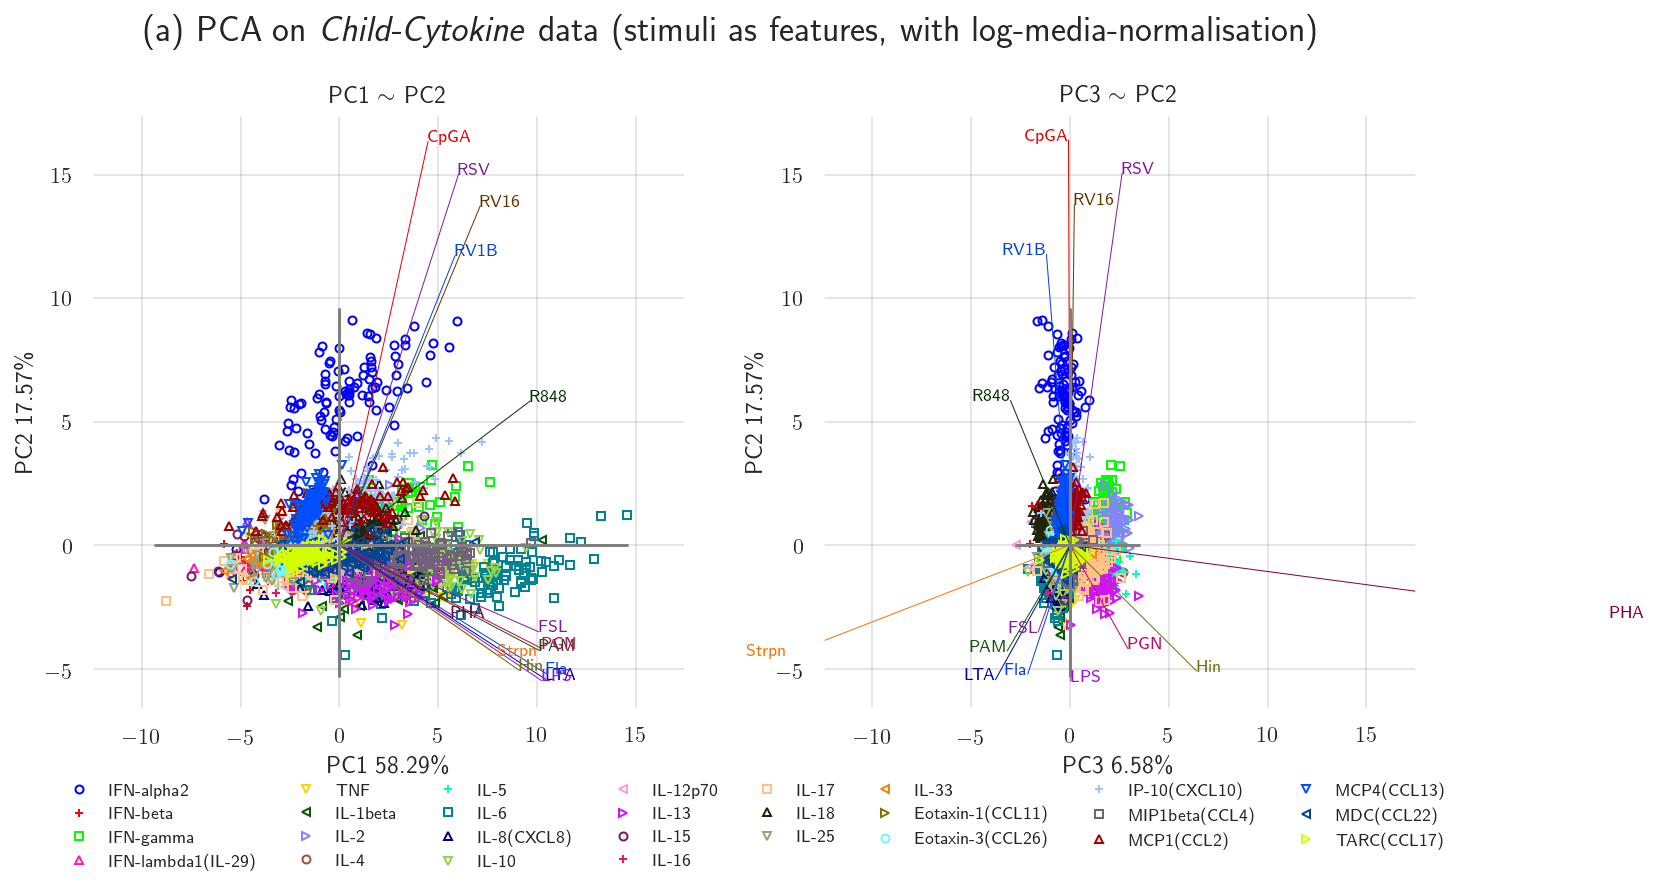

In [43]:

import matplotlib.gridspec as gridspec

prefix = 'Figure3a'
centered = True  # whether center the data or not
from lib.plot_pca_sk import plot_pca_repel



data = df_nrm_stim.copy()
stimlist = data.columns.values

# two options: include or exclude PHA
for HAVE_PHA in  [True]:
    fig = plt.figure(figsize=(12,7))
    gs = gridspec.GridSpec(2, 2,
                       width_ratios=[1,1],
                       height_ratios=[6,1])
    # gs.update(wspace=0.05,hspace=0.01)
    ax1 = fig.add_subplot(gs[0,0])
    ax2 = fig.add_subplot(gs[0,1])
    ax5 = fig.add_subplot(gs[1,:])

    stim_to_plot = stimlist[:]

    if HAVE_PHA == False:
        stim_to_plot.remove('PHA')
        suptitle = "All Cytokines and All Stimuli (excl. PHA, norm. by media, as features)"
        fname =  "stim_AllStimAllCyto_PC123_noPHA_nomedia.pdf"            
    else:
        suptitle = "(a)   PCA on \\textit{Child-Cytokine} data (stimuli as features, with log-media-normalisation)"
        fname = "PCA_AllStimAllCyto_June18.pdf"            
    fname = prefix + fname
    data_to_plot = data.loc[:,stim_to_plot]
    clust_to_plot = data_to_plot.index.get_level_values(0).values
    k_repel = 0.008
    ax1 = plot_pca_repel(data_to_plot, clust_to_plot, markevery=3,
             alpha =1, plot_weight = 1,legendon = False, ax=ax1, PCname=[1,2],extra_w = 1.16,k_repel = k_repel,
             centered = centered)
    ax1.set_title("PC1 $\\mathtt{\\sim}$ PC2")

    ax2 = plot_pca_repel(data_to_plot, clust_to_plot, markevery=3,
             alpha =1, plot_weight = 1,legendon = False, ax=ax2, PCname=[3,2],
             extra_w = 63.6/24.5*1.1,# non-cen weight
            k_repel = k_repel, centered = centered)
    ax2.set_title("PC3 $\\mathtt{\\sim}$ PC2")

    ax1.set_xlim([-12.5,17.5])
#         ax1.set_ylim([y0,y1])


    x0,x1 = ax1.get_xlim()
    y0,y1 = ax1.get_ylim()

    ax2.set_xlim([x0,x1])
    ax2.set_ylim([y0,y1])

    for ax in [ax1,ax2]:
        ax.set_aspect(abs(x1-x0)/abs(y1-y0))

    ax=ax5
    ax.grid(False)
    ax.set_facecolor('white')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.legend(*ax1.get_legend_handles_labels(), ncol=8, frameon=False,
              loc = "center",labelspacing = 0.5, fontsize ='x-small')
    ax.set_frame_on(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    plt.suptitle(suptitle,fontweight='bold',fontname = "Gill Sans MT Bold",fontsize=18)
#         fig.tight_layout()
    savefig(OutputDir + fname, bbox_inches="tight")




## Figure S7a: include media as spearate variable

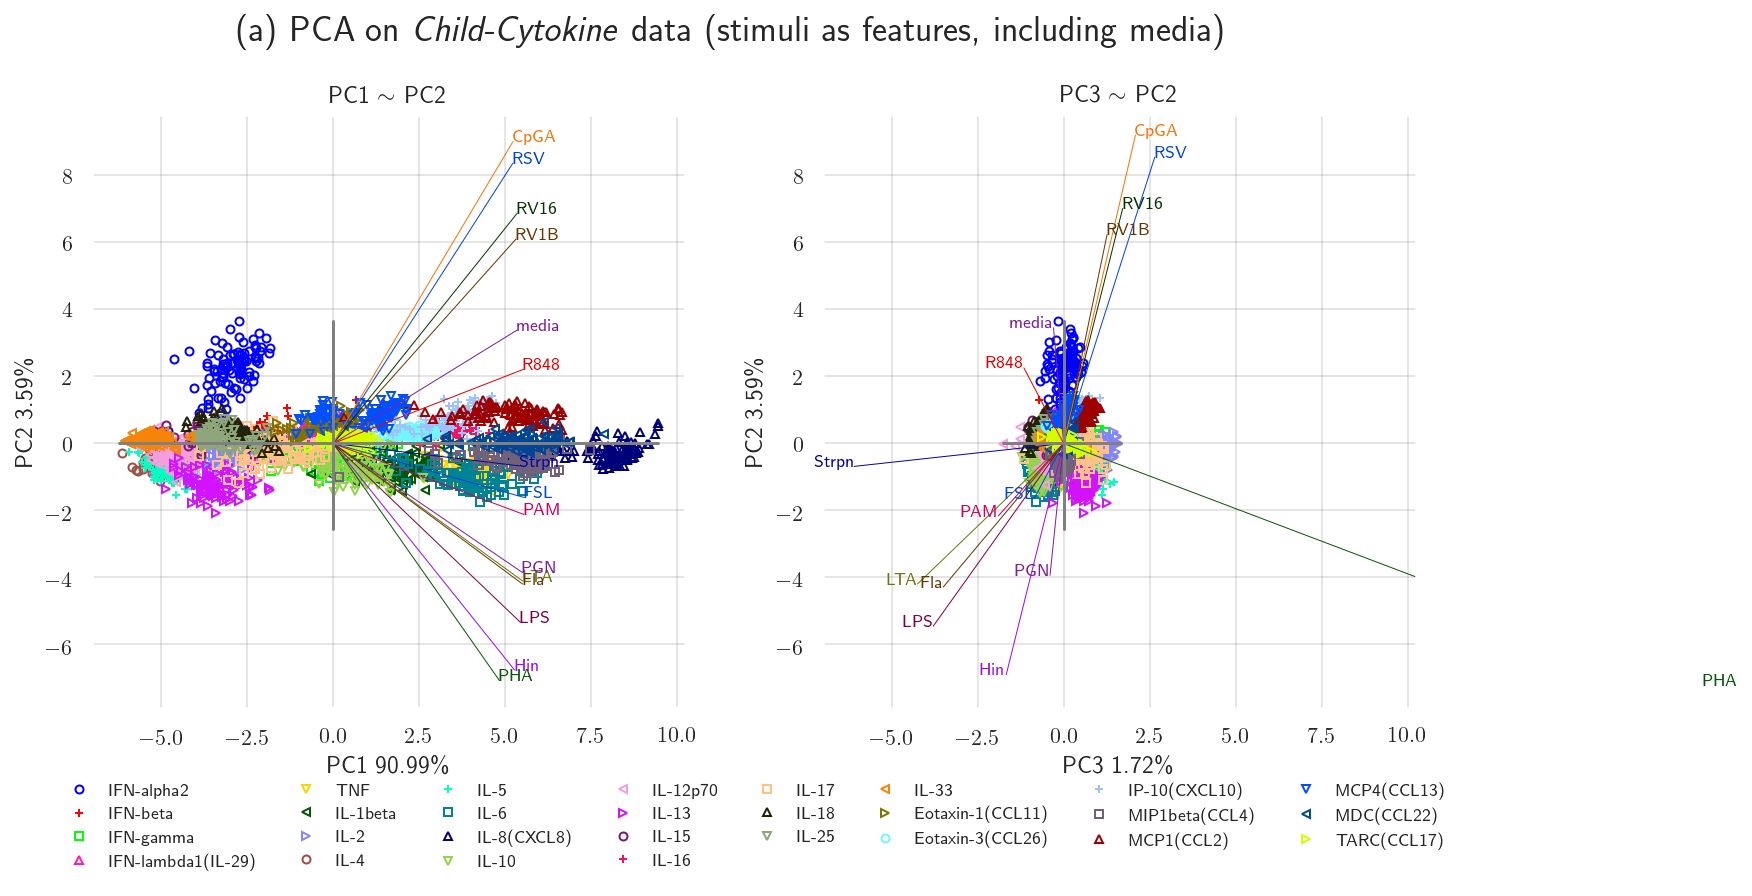

In [44]:
prefix = 'FigureS7a'
centered = True
from lib.plot_pca_sk import plot_pca_repel

data = df_log_stim.copy()

stimlist = data.columns.values
for HAVE_PHA in [ True]:
    fig = plt.figure(figsize=(12,7))
    gs = gridspec.GridSpec(2, 2,
                       width_ratios=[1,1],
                       height_ratios=[6,1])
    # gs.update(wspace=0.05,hspace=0.01)
    ax1 = fig.add_subplot(gs[0,0])
    ax2 = fig.add_subplot(gs[0,1])
    ax5 = fig.add_subplot(gs[1,:])

    stim_to_plot = stimlist[:]

    if HAVE_PHA == False:
        stim_to_plot.remove('PHA')
        suptitle = "All Cytokines and All Stimuli (excl. PHA, as features)"
        fname = "stim_AllStimAllCyto_PC123_noPHA.pdf"
    else:
        suptitle = "(a) PCA on \\textit{Child-Cytokine} data (stimuli as features, including media)"
        fname = "AllStimAllCyto_June18.pdf"
    fname = prefix + fname
    data_to_plot = data.loc[:,stim_to_plot]
    clust_to_plot = data_to_plot.index.get_level_values(0).values

    k_repel = 0.002


    ax1 = plot_pca_repel(data_to_plot, clust_to_plot, markevery=3,
             alpha =1, plot_weight = 1,legendon = False, ax=ax1, PCname=[1,2],extra_w = 1.1,k_repel = k_repel,
             centered = centered)
    ax1.set_title("PC1 $\\mathtt{\\sim}$ PC2")
    # note: plot-weight == -1 below
    ax2 = plot_pca_repel(data_to_plot, clust_to_plot, markevery=3,
         alpha =1, plot_weight = -1,legendon = False, ax=ax2, PCname=[3,2],extra_w = 2.1*63.6/24.5,
    k_repel = k_repel, centered = centered)
    ax2.set_title("PC3 $\\mathtt{\\sim}$ PC2")

    x0,x1 = ax1.get_xlim()
    y0,y1 = ax1.get_ylim()

    ax2.set_xlim([x0,x1])
    ax2.set_ylim([y0,y1])

    for ax in [ax1,ax2]:
        ax.set_aspect(abs(x1-x0)/abs(y1-y0))

    ax=ax5
    ax.grid(False)
    ax.set_facecolor('white')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.legend(*ax1.get_legend_handles_labels(), ncol=8, frameon=False,
              loc = "center",labelspacing = 0.5, fontsize ='x-small')

    plt.suptitle(suptitle,fontweight='bold',fontname = "Gill Sans MT Bold",fontsize=18)
#         fig.tight_layout()
    savefig(OutputDir + fname, bbox_inches="tight")





## Figure 3b: PCA on media-normalised data, cytokine as features

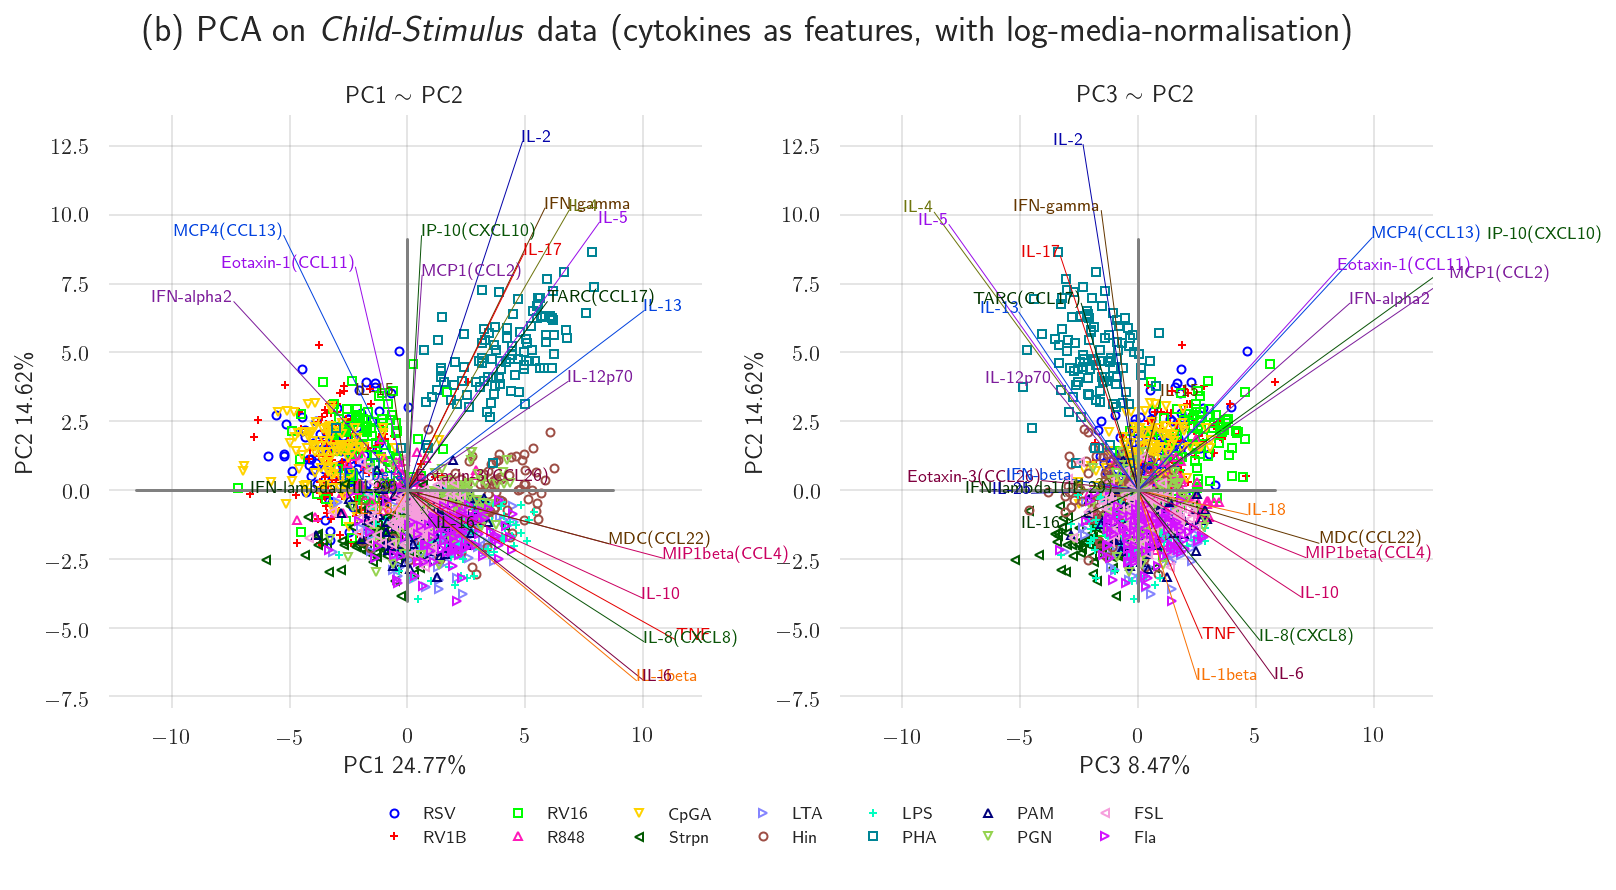

In [45]:
prefix = 'Figure3b'
centered = True


data = df_nrm_cyto.copy()
stimlist = stimlabel[1:]   
for HAVE_PHA in [ True]:
    fig = plt.figure(figsize=(12,7))
    gs = gridspec.GridSpec(2, 2,
                       width_ratios=[1,1],
                       height_ratios=[6,1])
    # gs.update(wspace=0.05,hspace=0.01)
    ax1 = fig.add_subplot(gs[0,0])
    ax2 = fig.add_subplot(gs[0,1])
    ax5 = fig.add_subplot(gs[1,:])

    stim_to_plot = stimlist[:]

    if HAVE_PHA == False:
        stim_to_plot.remove('PHA')
        suptitle = "All Stimuli (excl. PHA, norm. by media) and All Cytokines (as features)"
        fname = "cyto_AllStimAllCyto_PC123_noPHA_nomedia.pdf"            
    else:
        suptitle = "(b) PCA on \\textit{Child-Stimulus} data (cytokines as features, with log-media-normalisation)"
        fname = "Figure3b_June18.pdf"            

    fname = prefix + fname
    data_to_plot = data.loc[stim_to_plot,:]
    clust_to_plot = data_to_plot.index.get_level_values(0).values

    k_repel = 0.004
    ax1 = plot_pca_repel(data_to_plot, clust_to_plot, markevery=3,
             alpha =1, plot_weight = -1,legendon = False, ax=ax1, PCname=[1,2],extra_w = 1.1,k_repel = k_repel,
             centered = centered)
    ax1.set_title("PC1 $\\mathtt{\\sim}$ PC2")
    k_repel = 0.004
    ax2 = plot_pca_repel(data_to_plot, clust_to_plot, markevery=3,
             alpha =1, plot_weight = -1,legendon = False, ax=ax2, PCname=[3,2],extra_w = 1.69*1.1,k_repel = k_repel,
             centered = centered)
    ax2.set_title("PC3 $\\mathtt{\\sim}$ PC2")

    x0,x1 = ax1.get_xlim()
    y0,y1 = ax1.get_ylim()

    ax2.set_xlim([x0,x1])
    ax2.set_ylim([y0,y1])

    for ax in [ax1,ax2]:
        ax.set_aspect(abs(x1-x0)/abs(y1-y0))
        ax.set_frame_on(False)



    ax=ax5
    ax.grid(False)
    ax.set_facecolor('white')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.legend(*ax1.get_legend_handles_labels(), ncol=7, frameon=False,
              loc = "center",labelspacing = 0.5, fontsize ='x-small')
    ax.set_frame_on(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    plt.suptitle(suptitle,fontweight='bold',fontname = "Gill Sans MT Bold",fontsize=18)

    savefig(OutputDir + fname, bbox_inches="tight")




## Figure S7b: include media as independent variable, cytokine as features

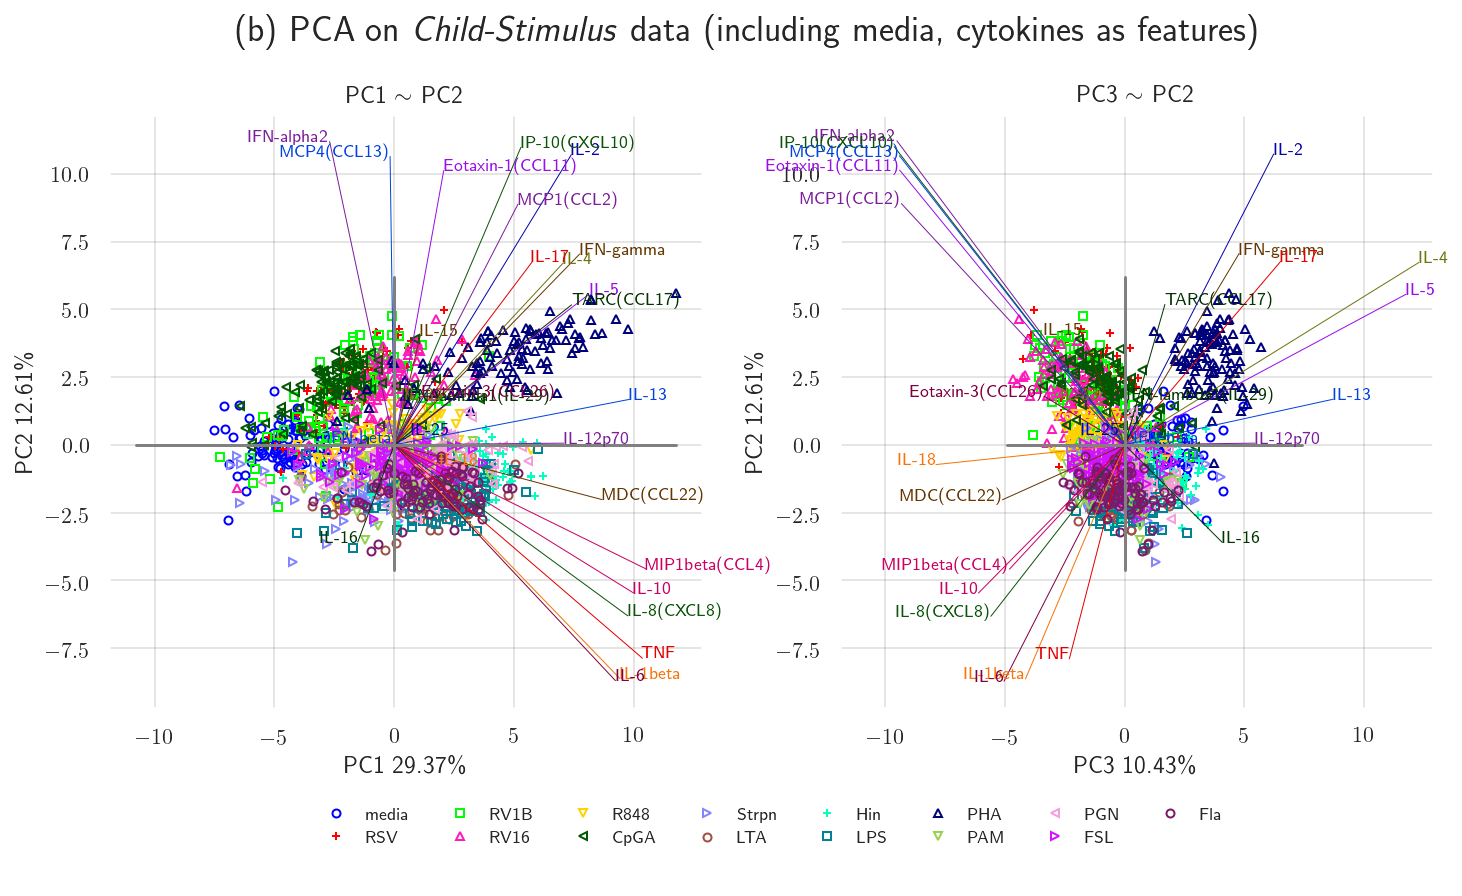

In [46]:
prefix = 'FigureS7b'
centered = True

data = df_log_cyto.copy()
stimlist = stimlabel[:]

for HAVE_PHA in [ True]:
    fig = plt.figure(figsize=(12,7))
    gs = gridspec.GridSpec(2, 2,
                       width_ratios=[1,1],
                       height_ratios=[6,1])
    # gs.update(wspace=0.05,hspace=0.01)
    ax1 = fig.add_subplot(gs[0,0])
    ax2 = fig.add_subplot(gs[0,1])
    ax5 = fig.add_subplot(gs[1,:])

    stim_to_plot = stimlist[:]

    if HAVE_PHA == False:
        stim_to_plot.remove('PHA')
        suptitle = "All Stimuli (excl. PHA), All Cytokines (as features)"
        fname = "cyto_AllStimAllCyto_PC123_noPHA.pdf"
    else:
        suptitle = "(b) PCA on \\textit{Child-Stimulus} data (including media, cytokines as features)"
        fname = "withMediaCytokineAsFeatures.pdf"
    
    fname = prefix + fname
    data_to_plot = data.loc[stim_to_plot,:]
    clust_to_plot = data_to_plot.index.get_level_values(0).values

    k_repel = 0.003
    ax1 = plot_pca_repel(data_to_plot, clust_to_plot, markevery=3,
             alpha =1, plot_weight = 1,legendon = False, ax=ax1, PCname=[1,2],extra_w = 1,k_repel = k_repel,
             centered = centered)
    ax1.set_title("PC1 $\\mathtt{\\sim}$ PC2")
    k_repel = 0.005
    ax2 = plot_pca_repel(data_to_plot, clust_to_plot, markevery=3,
             alpha =1, plot_weight = 1,legendon = False, ax=ax2, PCname=[3,2],extra_w = 1.6,k_repel = k_repel,
             centered = centered)
    ax2.set_title("PC3 $\\mathtt{\\sim}$ PC2")

    x0,x1 = ax1.get_xlim()
    y0,y1 = ax1.get_ylim()

    ax2.set_xlim([x0,x1])
    ax2.set_ylim([y0,y1])
 
    for ax in [ax1,ax2]:
        ax.set_aspect(abs(x1-x0)/abs(y1-y0))



    ax=ax5
    ax.grid(False)
    ax.set_facecolor('white')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.legend(*ax1.get_legend_handles_labels(), ncol=8, frameon=False,
              loc = "center",labelspacing = 0.5, fontsize ='x-small')

    plt.suptitle(suptitle,fontweight='bold',fontname = "Gill Sans MT Bold",fontsize=18)

    savefig(OutputDir + fname, bbox_inches="tight")





## Figure 3c

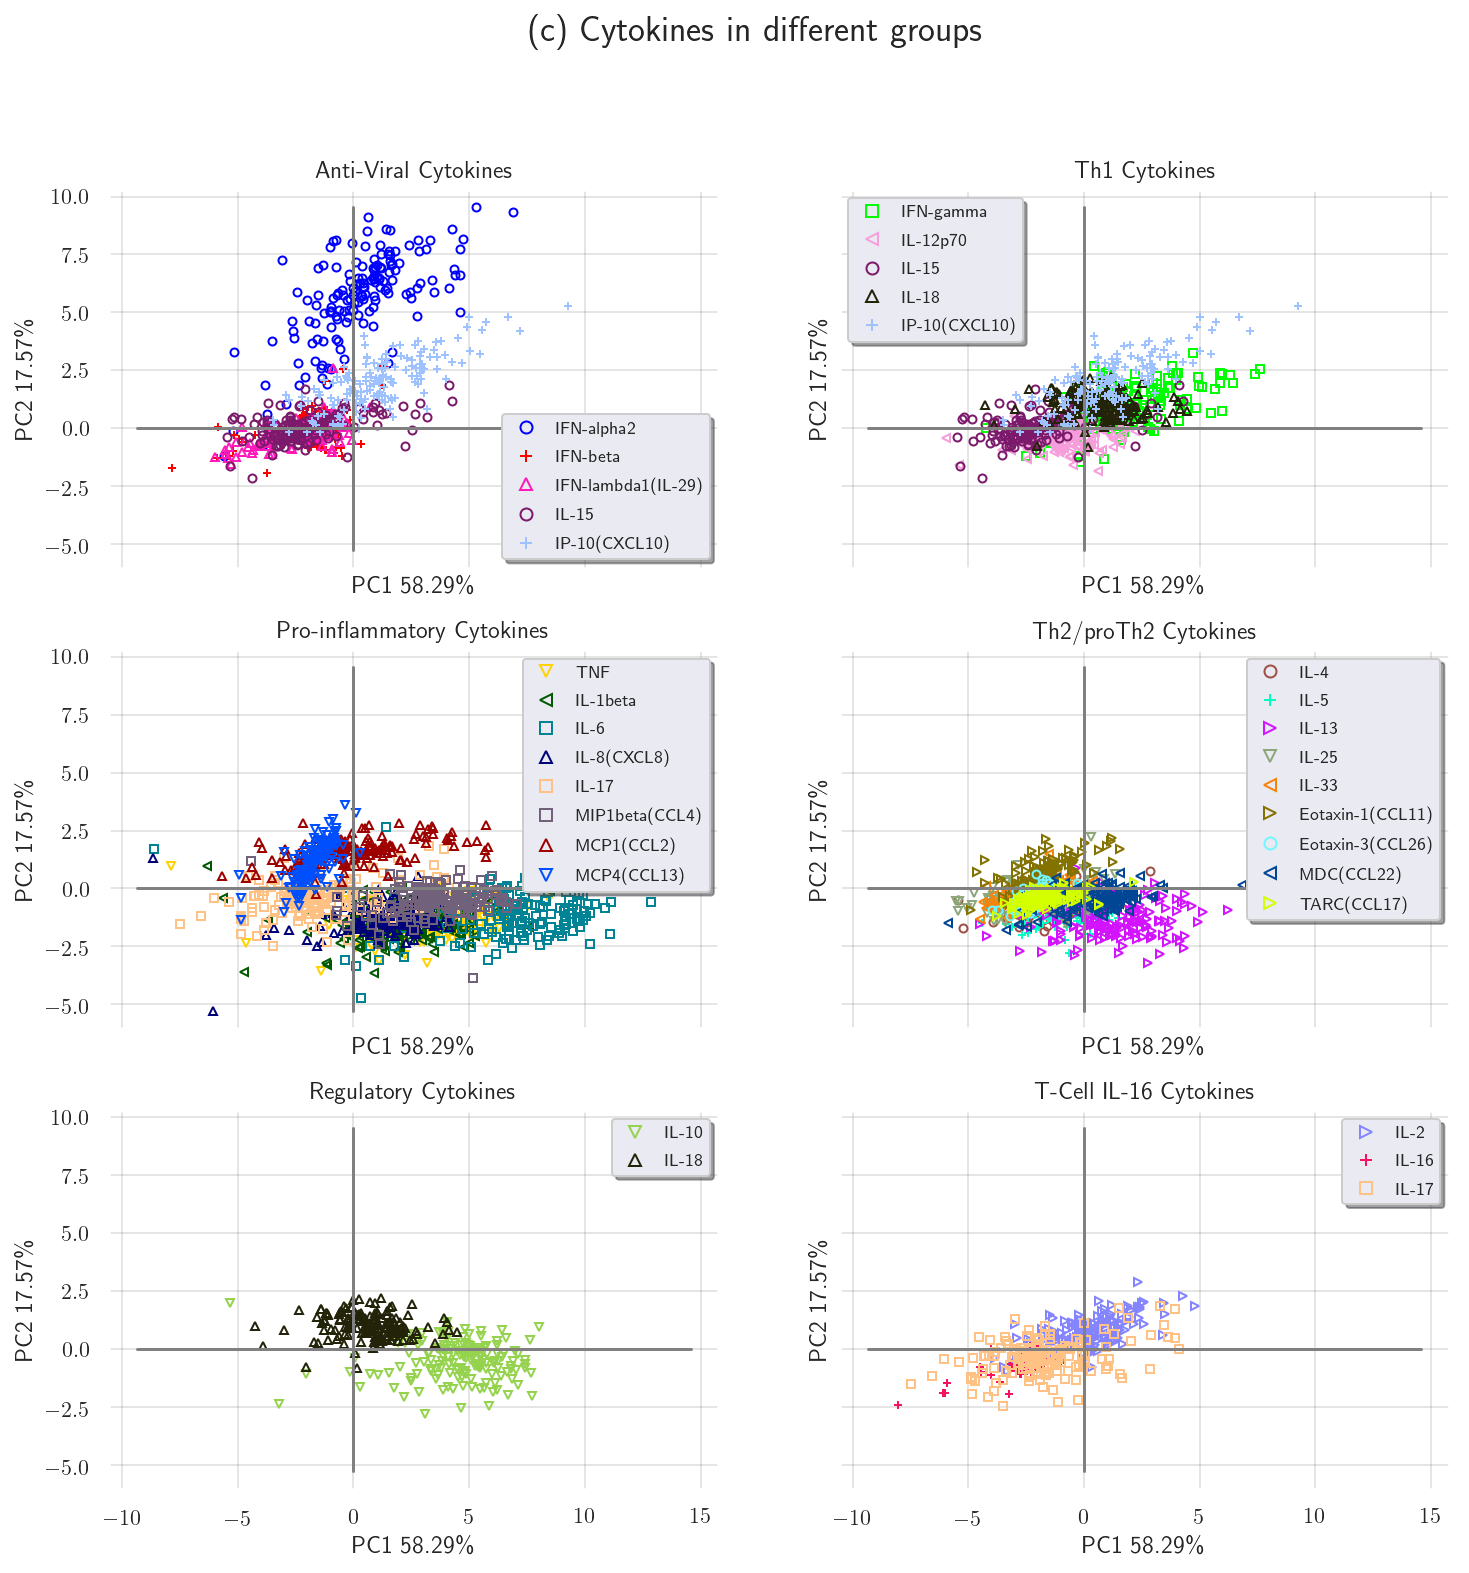

In [47]:
from lib.plot_pca_sk import plot_pca_filt
from functools import reduce
fig,axes = plt.subplots(3,2,figsize=(12,12),sharex = True, sharey =True)
axes = axes.flatten()
stimlist = stimlabel[:]
stimlist.remove('media')

for i,cyto in enumerate([['Anti-Viral'],['Th1'],['Pro-inflammatory'],['Th2/proTh2'],['Regulatory'], ['T-Cell','IL-16']]):
    
    filt = reduce(lambda x,y: x+y, (CytoDict[i] for i in cyto))
    
    df_stim = df_nrm_stim.loc[:,stimlist]
    clust = df_nrm_stim.index.get_level_values(0).values
    ax = axes[i]
    if i==0:
        plot_weight = 0
    else:
        plot_weight = 0
    ax = plot_pca_filt(df_stim, clust,filt= filt, markevery=2,
             alpha =1, plot_weight = plot_weight,legendon = 'best', ax=ax, PCname=[1,2],
            k_repel = 0.002, centered = True)
    title = ' '.join([reduce(lambda x,y: x+' '+y,cyto ),  ' Cytokines'])
    ax.set_title(title)
    ax.set_aspect('equal')
plt.suptitle('(c) Cytokines in different groups ',fontsize = 18, fontweight = "bold")
fname = "Figure3c_SeparateCytokineGroups_June18.pdf"
savefig(OutputDir + fname.replace('/','-'), bbox_inches="tight",doi = 1200)




# Stratified PCA and HC

Here we only consider data with cytokines and stimuli in a certain group. The group profile were defined in the dictionary: **``CytoDict``** and **``StimDict``**


***
* Figure 4:  Pro-inflammatory cytokine vs Bacterial stimuli
* Figure 5: Anti-viral vs Viral stimuli
* Figure S9b: Th1  vs Bacterial/Viral stimuli
* Figure S10b: Th2/proTh2 vs Bacterial/Viral stimuli
***

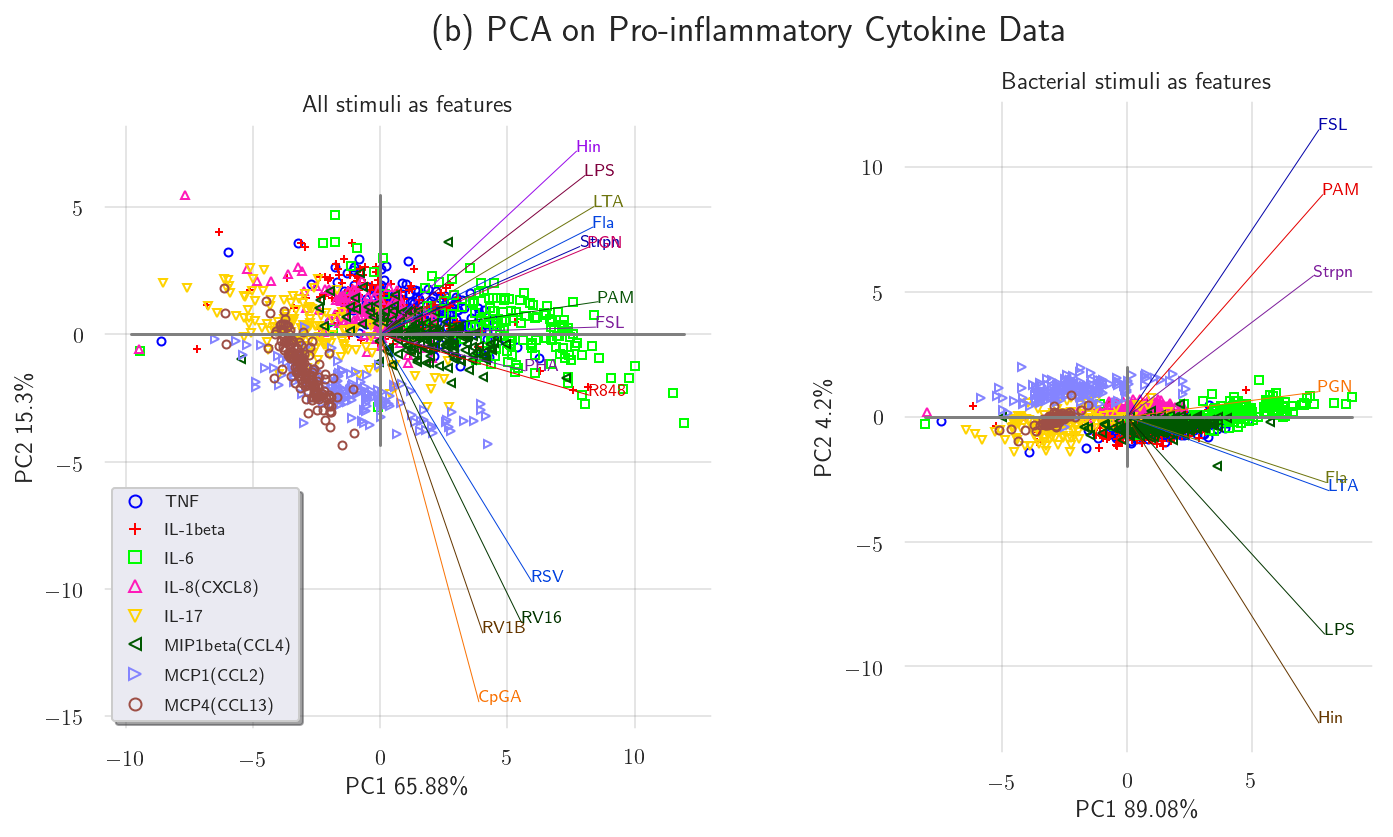

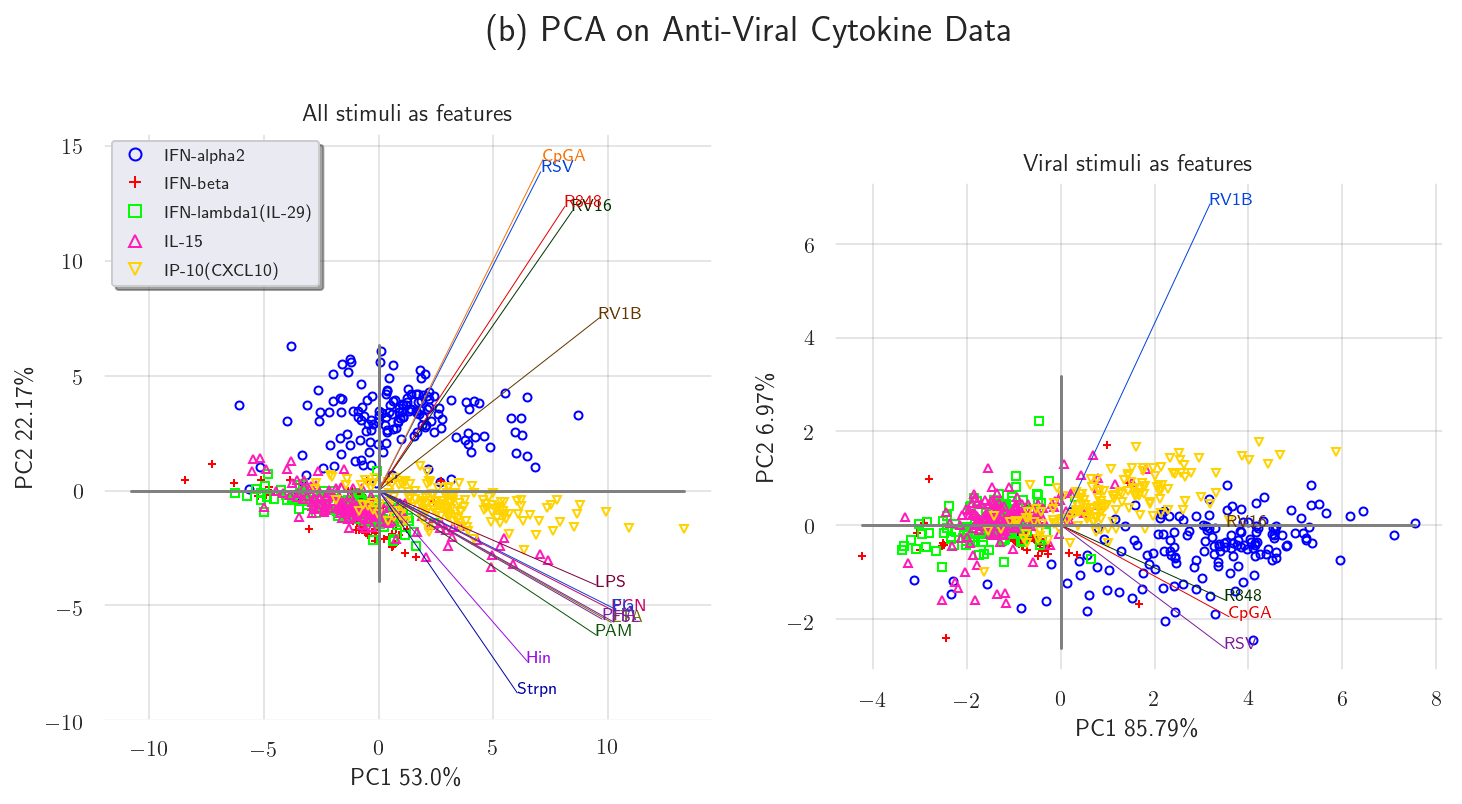

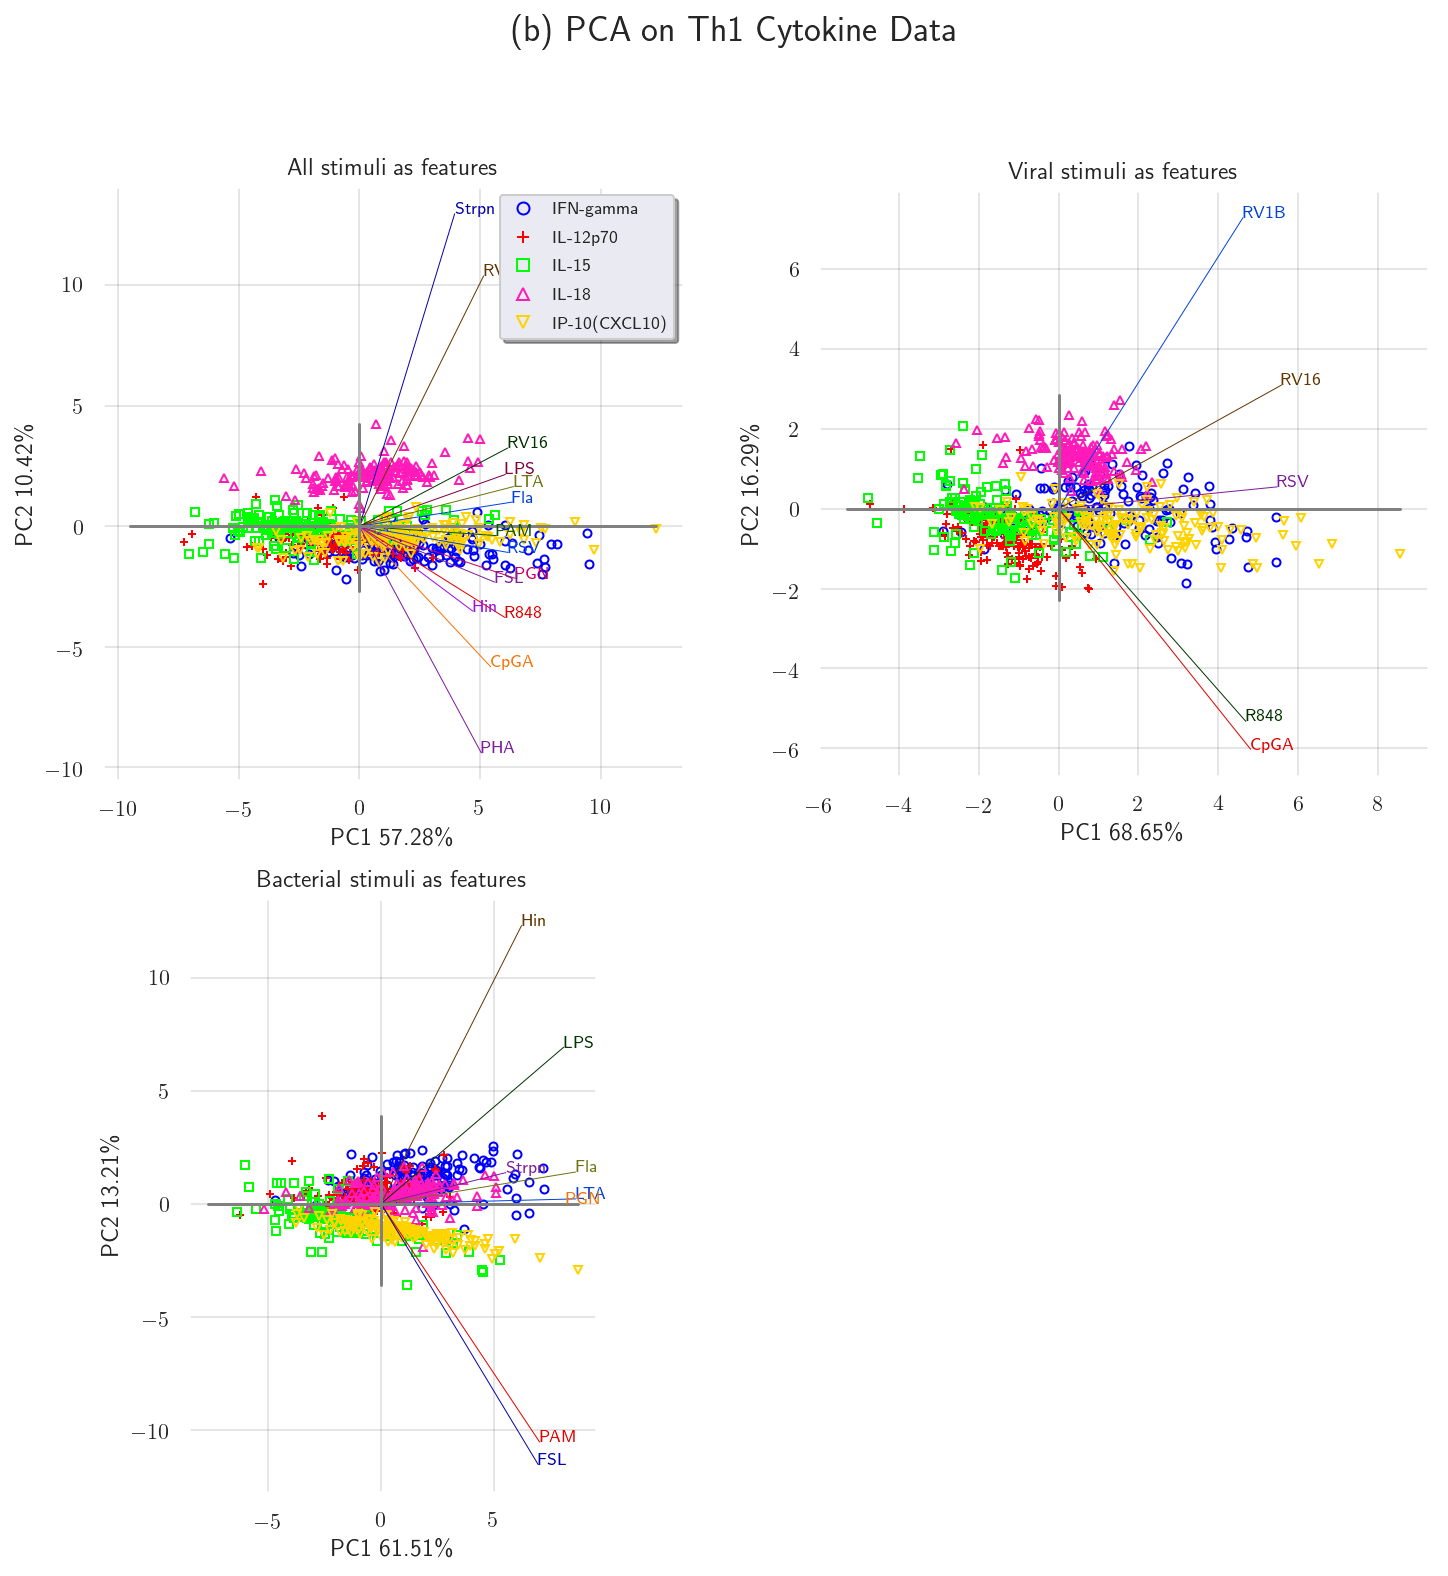

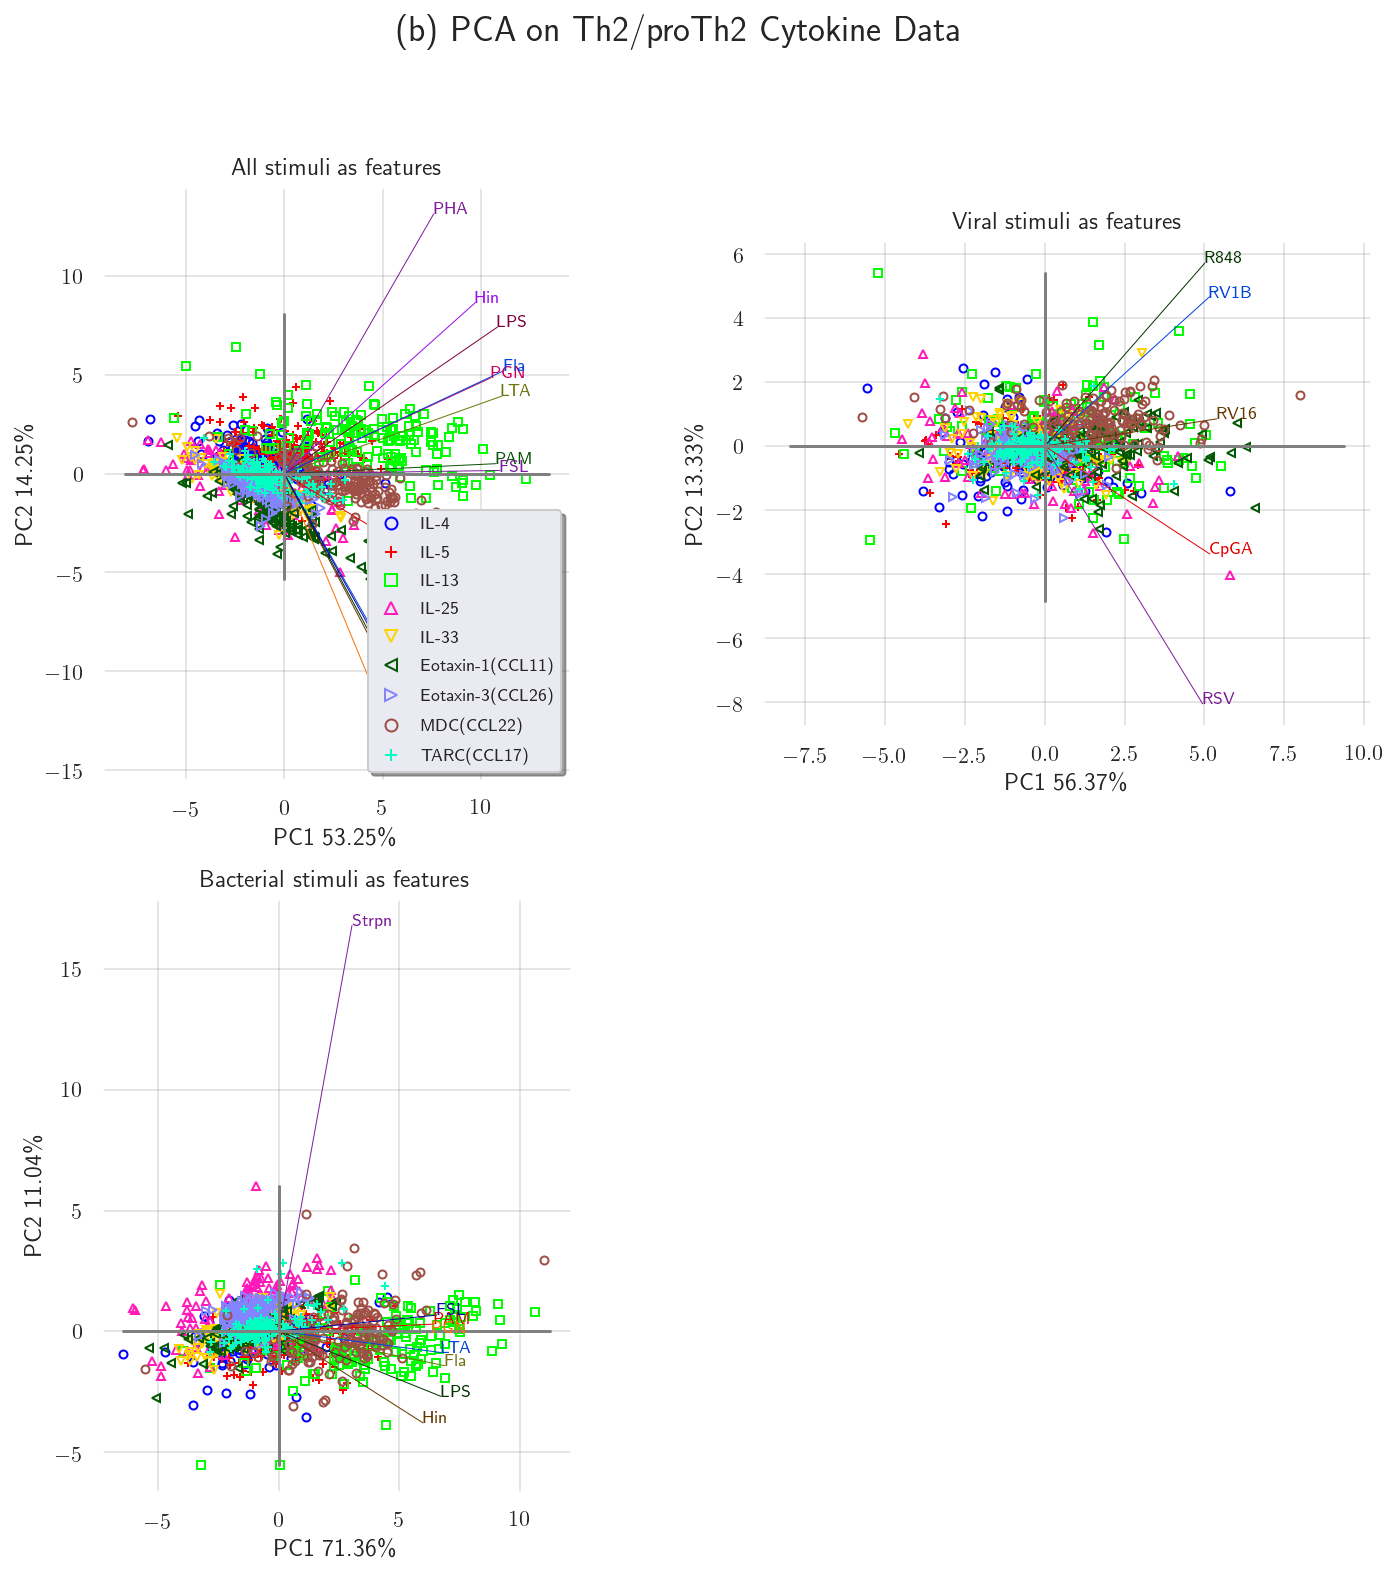

In [48]:
from lib.plot_stratPCA import plot_stratPCA

cytogrouplist = ['Pro-inflammatory', 'Anti-Viral','Th1','Th2/proTh2']
prefixlist = ['Figure4b','Figure5b','FigureS9b','FigureS10b']
for (cytogroup,prefix) in zip(cytogrouplist,prefixlist):
    plot_stratPCA(df_nrm_stim, cytogroup, CytoDict, StimDict, HAVE_PHA = True, 
                  prefix = prefix, addlabel='(b) ', OutputDir= OutputDir)

### Straitified HC

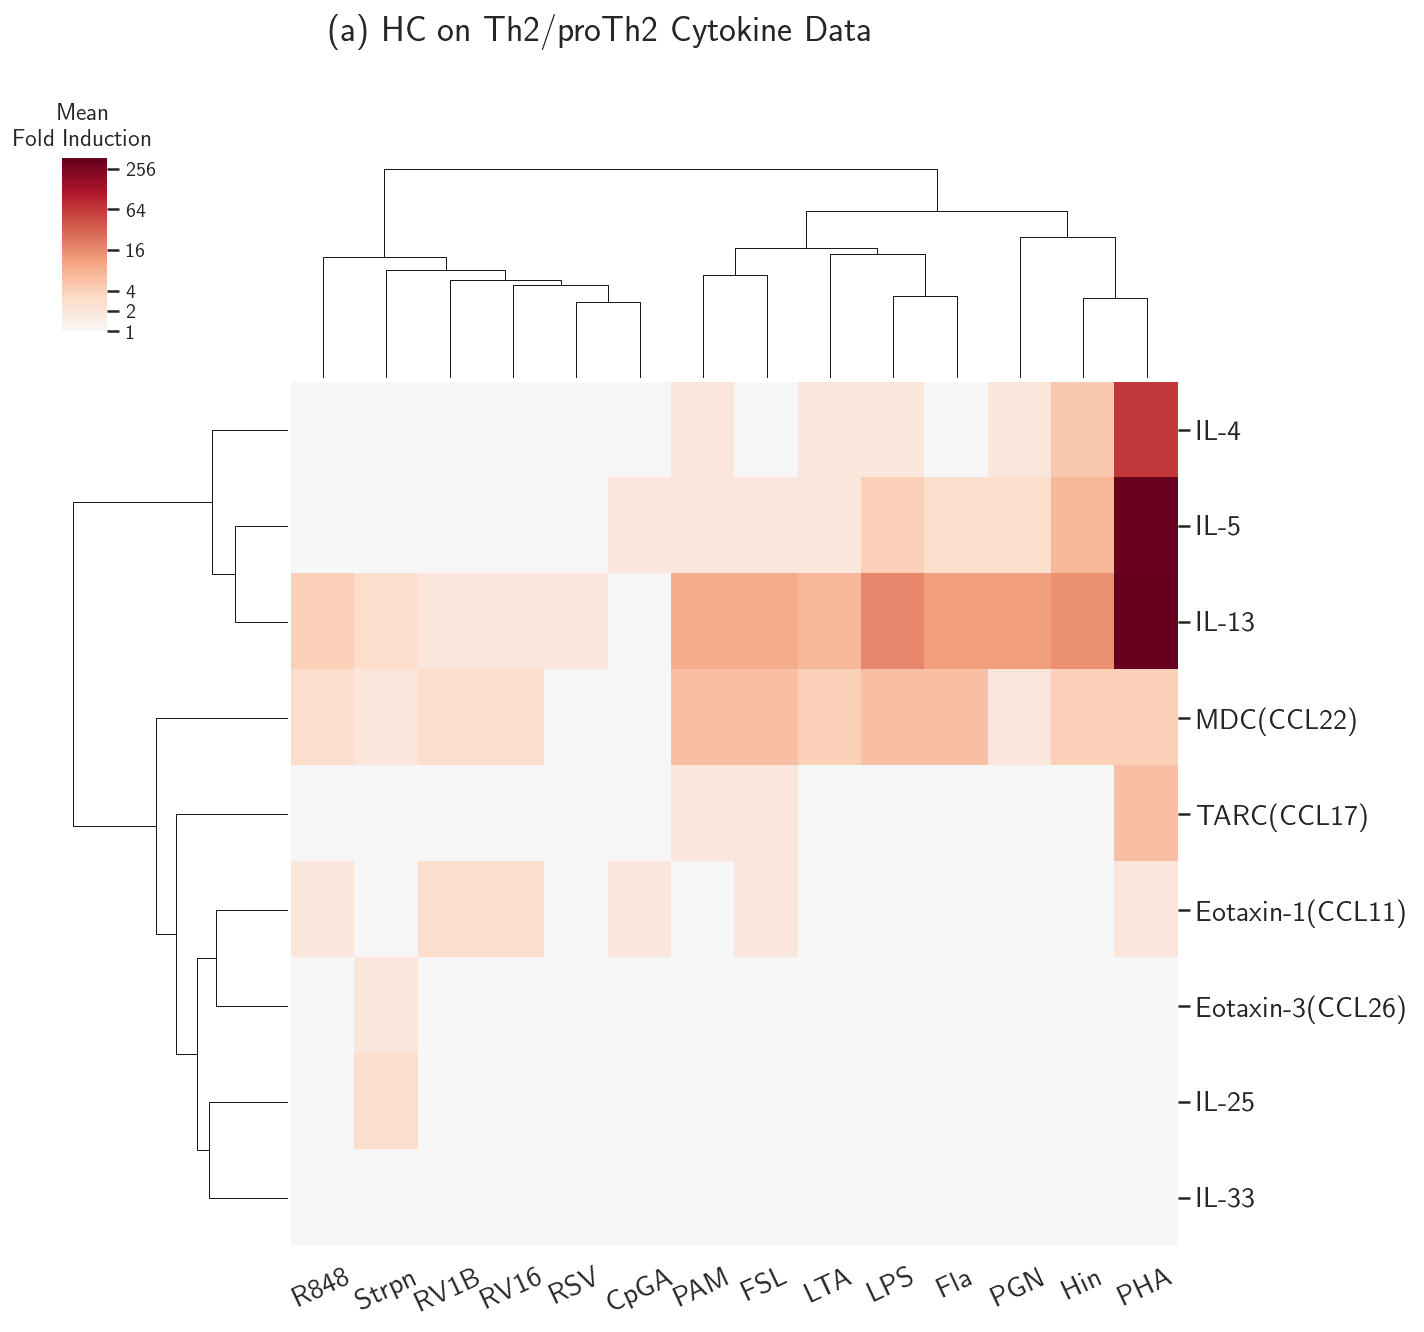

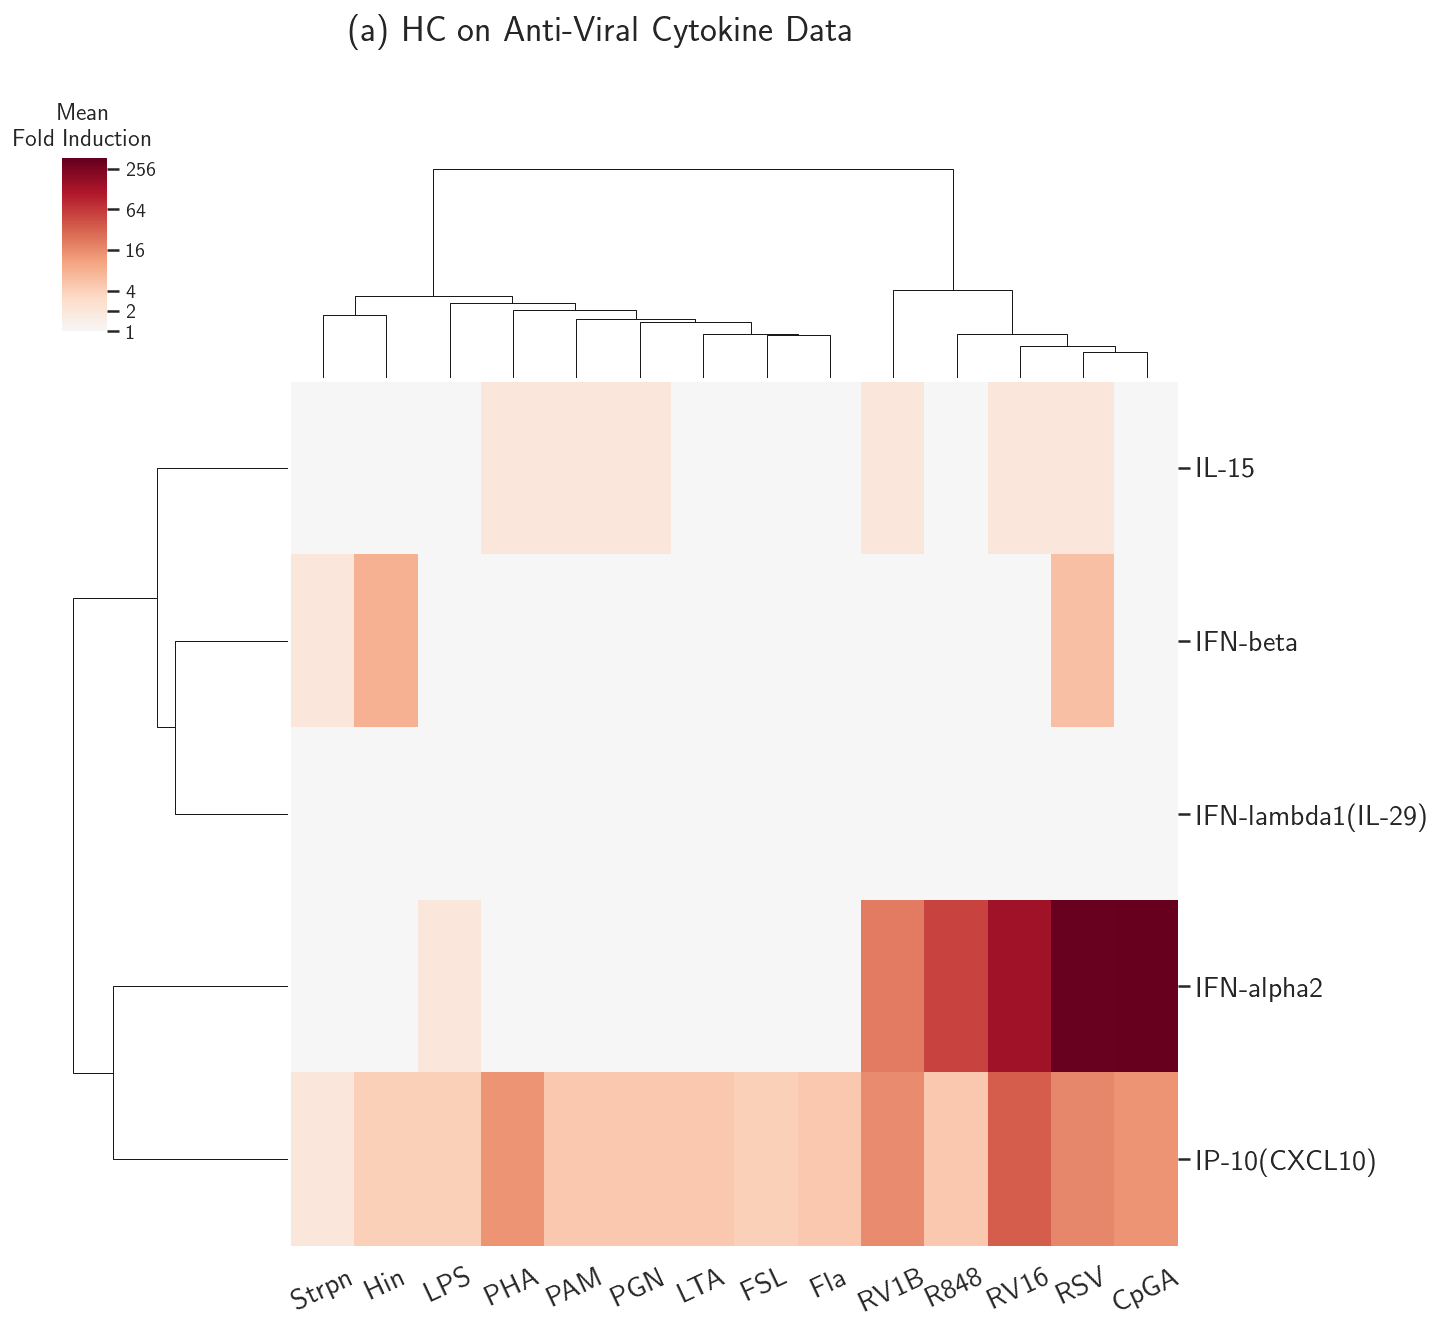

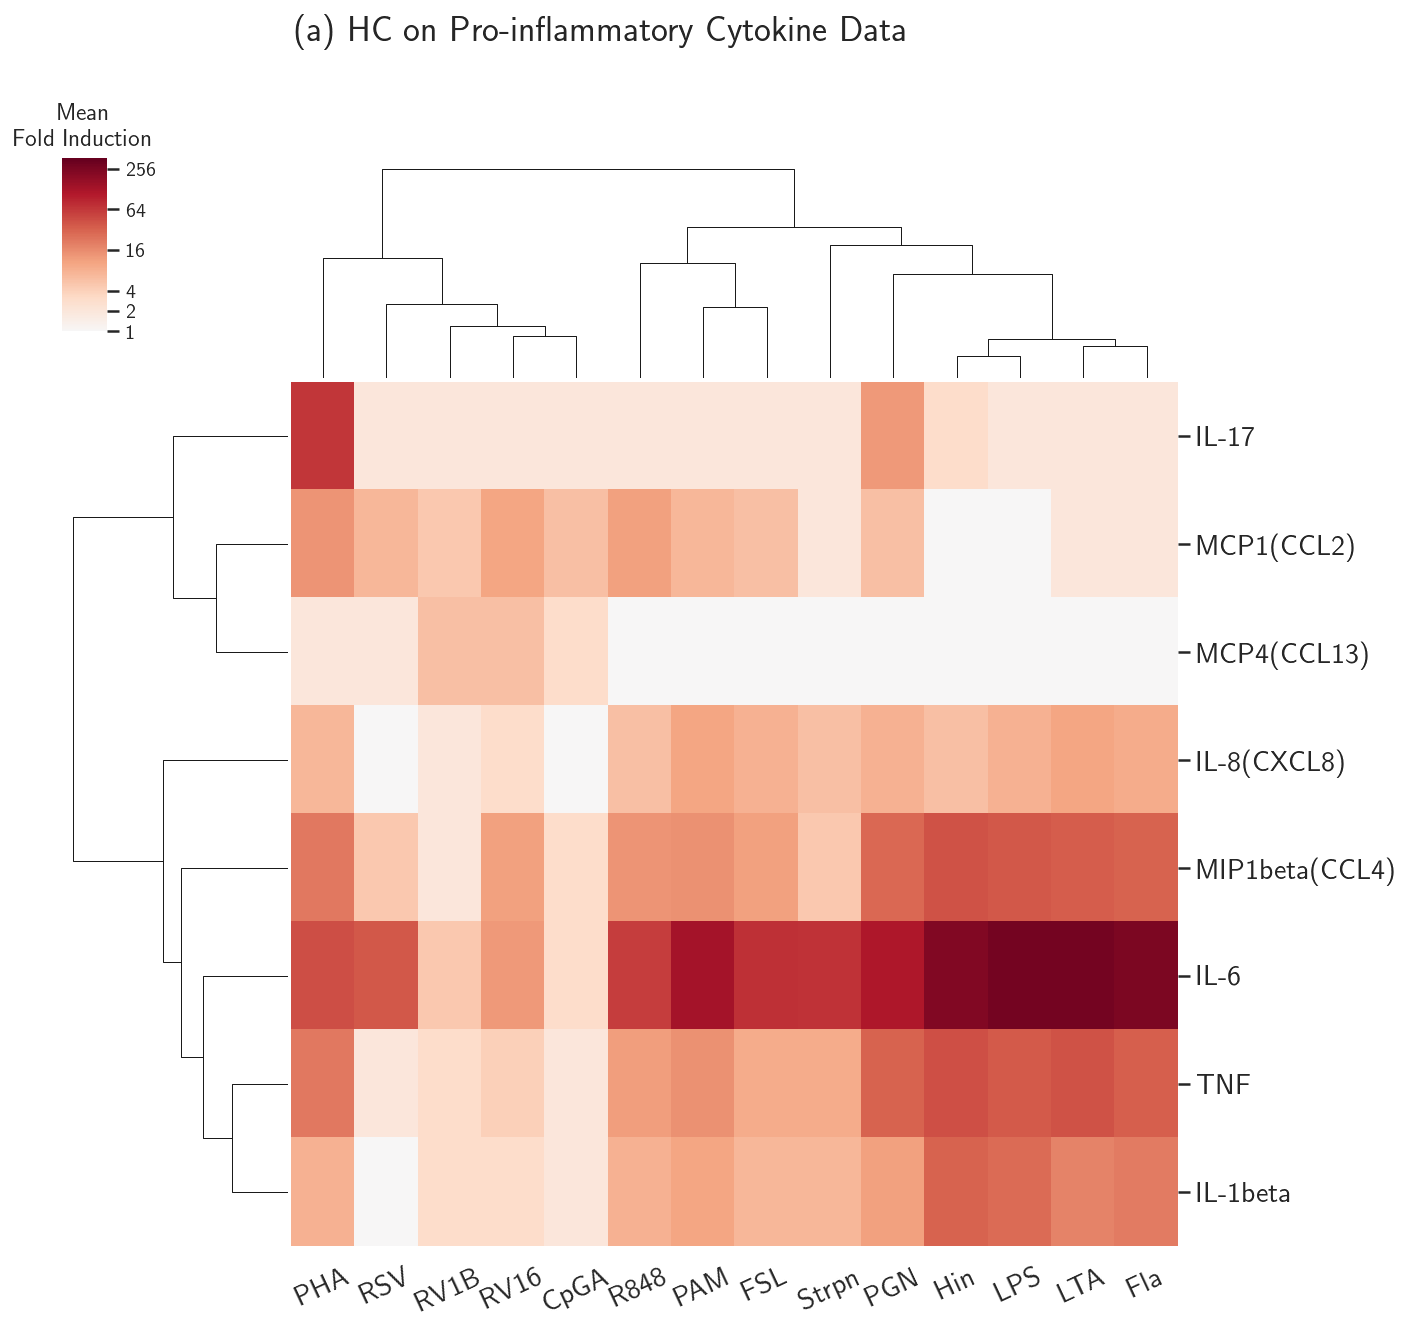

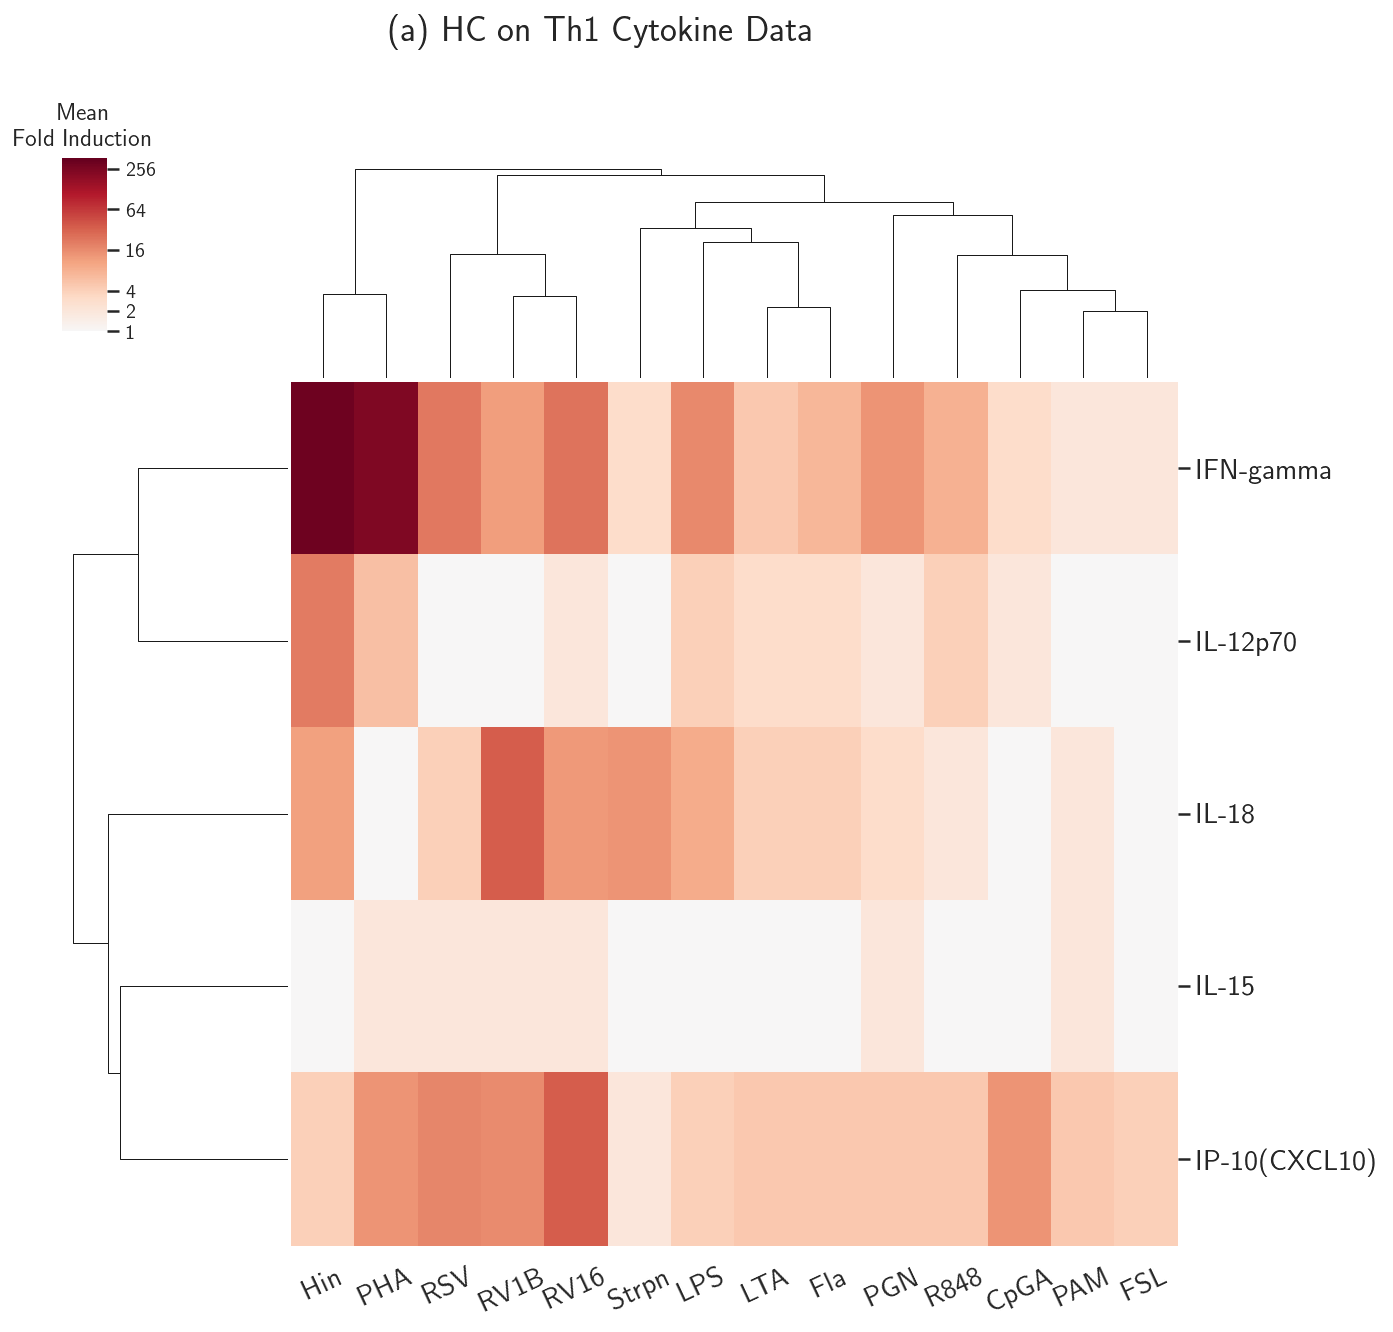

In [49]:
datapanel = datapanel_nrm.copy()

cbar_ticks = [0,1,2,4,6,8]
cbar_ticklabels = np.power(2,cbar_ticks)


for cy_gp in ['Th2/proTh2', 'Anti-Viral', 'Pro-inflammatory', 'Th1']:
    if cy_gp == 'Pro-inflammatory':
        prefix = 'Figure4a'
    elif cy_gp == 'Anti-Viral':
        prefix = 'Figure5a'
    elif cy_gp == 'Th1':
        prefix = 'FigureS9a'
    elif cy_gp == 'Th2/proTh2':
        prefix = 'FigureS10a'
        
    cytolist = CytoDict[cy_gp]
    stim = 'All'
    stimlist = stimlabel[1:]

    dp_cyto = datapanel.loc[cytolist,:,stimlist]
    
    CS_mean = np.log2(meanFold.loc[cytolist,stimlist])
    fname = prefix + cy_gp + stim + "clustermap_ccorr_aver_June18.pdf"
    plot_clustermap(dp_cyto,dist='c_correlation',
                mean = CS_mean,
                fname = OutputDir + fname.replace('/','_'),
                gp=False, fontsize = 'large', 
                addlabel='(a)' + ' HC on ' + cy_gp + ' Cytokine Data',
                cbar_title = 'Mean \n Fold Induction', vmax = 8.5,
                cbar_ticks = cbar_ticks, cbar_ticklabels = cbar_ticklabels
               )


# Clustering cytokine-stimulus pairs for stratified groups
---
### Figure 4c: Pro-inflammatory (strongly induced) vs bacterial stimuli
### Figure 5c: Anti-Viral (strongly induced) vs Viral stimuli

In [50]:
## Define new cytokine dictionary where we introduce "strongly induced" category
CytoDict = {'Anti-Viral':['IFN-alpha2', 'IFN-beta', 
                        'IFN-lambda1(IL-29)', 'IL-15', 'IP-10(CXCL10)'],
            'Strong Anti-Viral':['IFN-alpha2',  'IP-10(CXCL10)'], #'IFN-beta','IL-15', 'IFN-lambda1(IL-29)'
           'Th1': ['IFN-gamma', 'IL-12p70', 'IL-15'  ,  'IL-18'  ,  'IP-10(CXCL10)'],
           'Strong Th1': ['IFN-gamma', 'IL-12p70'  ,  'IP-10(CXCL10)','IL-18' , ], #,  'IL-15' 
           'Th2/proTh2': ['IL-4', 'IL-5', 'IL-13', 'IL-25', 'IL-33', 'Eotaxin-1(CCL11)', 
                          'Eotaxin-3(CCL26)', 'MDC(CCL22)', 'TARC(CCL17)'],
            'Strong Th2/proTh2': ['IL-4', 'IL-5', 'IL-13',#  'Eotaxin-1(CCL11)',
                                  #TARC(CCL17)',IL-25', 'IL-33','Eotaxin-3(CCL26)',
                           'MDC(CCL22)'],
           'Pro-inflammatory':['TNF', 'IL-1beta', 'IL-6', 'IL-8(CXCL8)', 
                               'IL-17', 'MIP1beta(CCL4)', 'MCP1(CCL2)', 'MCP4(CCL13)'],
            'Strong Pro-inflammatory':['TNF', 'IL-1beta', 'IL-6', 'IL-8(CXCL8)', 
                               'MIP1beta(CCL4)', 'MCP1(CCL2)'],
           'T-Cell':['IL-2',  'IL-17'],
            'IL-16':['IL-16'],
           'Regulatory':['IL-10', 'IL-18'],
           'All': ['IFN-alpha2', 'IFN-beta', 'IFN-gamma', 'IFN-lambda1(IL-29)',
               'TNF', 'IL-1beta', 'IL-2', 'IL-4', 'IL-5', 'IL-6',
               'IL-8(CXCL8)', 'IL-10', 'IL-12p70', 'IL-13', 'IL-15', 'IL-16',
               'IL-17', 'IL-18', 'IL-25', 'IL-33', 'Eotaxin-1(CCL11)',
               'Eotaxin-3(CCL26)', 'IP-10(CXCL10)', 'MIP1beta(CCL4)', 'MCP1(CCL2)',
               'MCP4(CCL13)', 'MDC(CCL22)', 'TARC(CCL17)'],
           'Strong': ['IFN-alpha2',  'IFN-gamma', # 'IFN-beta', 'IFN-lambda1(IL-29)', 'IL-15', 
               'TNF', 'IL-1beta', 'IL-2', 'IL-4', 'IL-5', 'IL-6',
               'IL-8(CXCL8)', 'IL-10', 'IL-12p70', 'IL-13', 'IL-16',
                 'Eotaxin-1(CCL11)',#'IL-17','MCP4(CCL13)', 'Eotaxin-3(CCL26)', 'IL-18','IL-25', 'IL-33', 
              'IP-10(CXCL10)', 'MIP1beta(CCL4)', 'MCP1(CCL2)',
                'MDC(CCL22)', 'TARC(CCL17)']}
StimDict = {'T-cells': ['PHA'],
            'Live-virus': ['RSV','RV1B','RV16'],
            'Ligand-virus':['R848','CpGA'],
            'Viral':['RSV','RV1B','RV16','R848','CpGA'],
#             'Ligand-virus':['polyIC','R848','CpGA'],
#             'Viral':['RSV','RV1B','RV16','polyIC','R848','CpGA'],
            'ViralPHA':['RSV','RV1B','RV16','R848','CpGA','PHA'],
            'Bacterial':['Strpn','LTA','Hin','LPS','PAM','PGN','FSL','Fla'],
            'BacterialPHA':['Strpn','LTA','Hin','LPS','PAM','PGN','FSL','Fla','PHA'],
            'All': ['PHA','RSV','RV1B','RV16','R848','CpGA','Strpn','LTA','Hin','LPS','PAM','PGN','FSL','Fla']}
            



In [51]:

from scipy.spatial.distance import pdist
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import scale
from scipy.stats import spearmanr


def my_dist(df,dist = 'c_correlation',sm_with_mean=False, sm_with_std=False ): # distance between columns in df
    scale(df, axis=1, with_mean=sm_with_mean, with_std=sm_with_mean,copy=False)  # scale across samples
    X = df.values
    if dist in ['seuclidean', 'euclidean'] :
        V= np.var(X,axis=1)
        V[V==0]=1e-6
        Y = pdist(X.T, 'seuclidean',V=V)
    elif dist == 'c_correlation': # data centered correlation
        V= np.mean(X,axis=1) # mean for each row
        X = X-V[:,np.newaxis]
#         U = np.std(X,axis=1)
#         X = X/U[:,np.newaxis]
        Y = pdist(X.T, 'correlation')  # .T because pdist compute row (i.e., 'observation') dist
    elif dist == 'spearman':
        Y,_ = spearmanr(X)  # this is comput column correleation
        Y = 1 - Y  # distance
        Y = Y[np.triu_indices_from(Y,1)]
    else:
        Y = pdist(X.T, dist)   # Returns a condensed distance matrix Y. For each i and j (where i<j<n), 
                               # the metric dist(u=X[i], v=X[j]) is computed and stored in entry (i+1)j.
    link = linkage(Y,method='average')    
    
    # construct a distance matrix
    Y_mat = np.zeros((df.shape[1],df.shape[1]))
    Y_mat[np.triu_indices(Y_mat.shape[0],1)] = Y # Y is for the upper triangular part of Y_Mat
    Y_mat = Y_mat.T
    Y_mat[np.triu_indices(Y_mat.shape[0],1)] = Y
    Y_mat = pd.DataFrame(Y_mat,index=df.columns,columns=df.columns) # distance matrix/dataframe
    return Y_mat,link




Th2/proTh2


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Gill Sans MT Bold'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


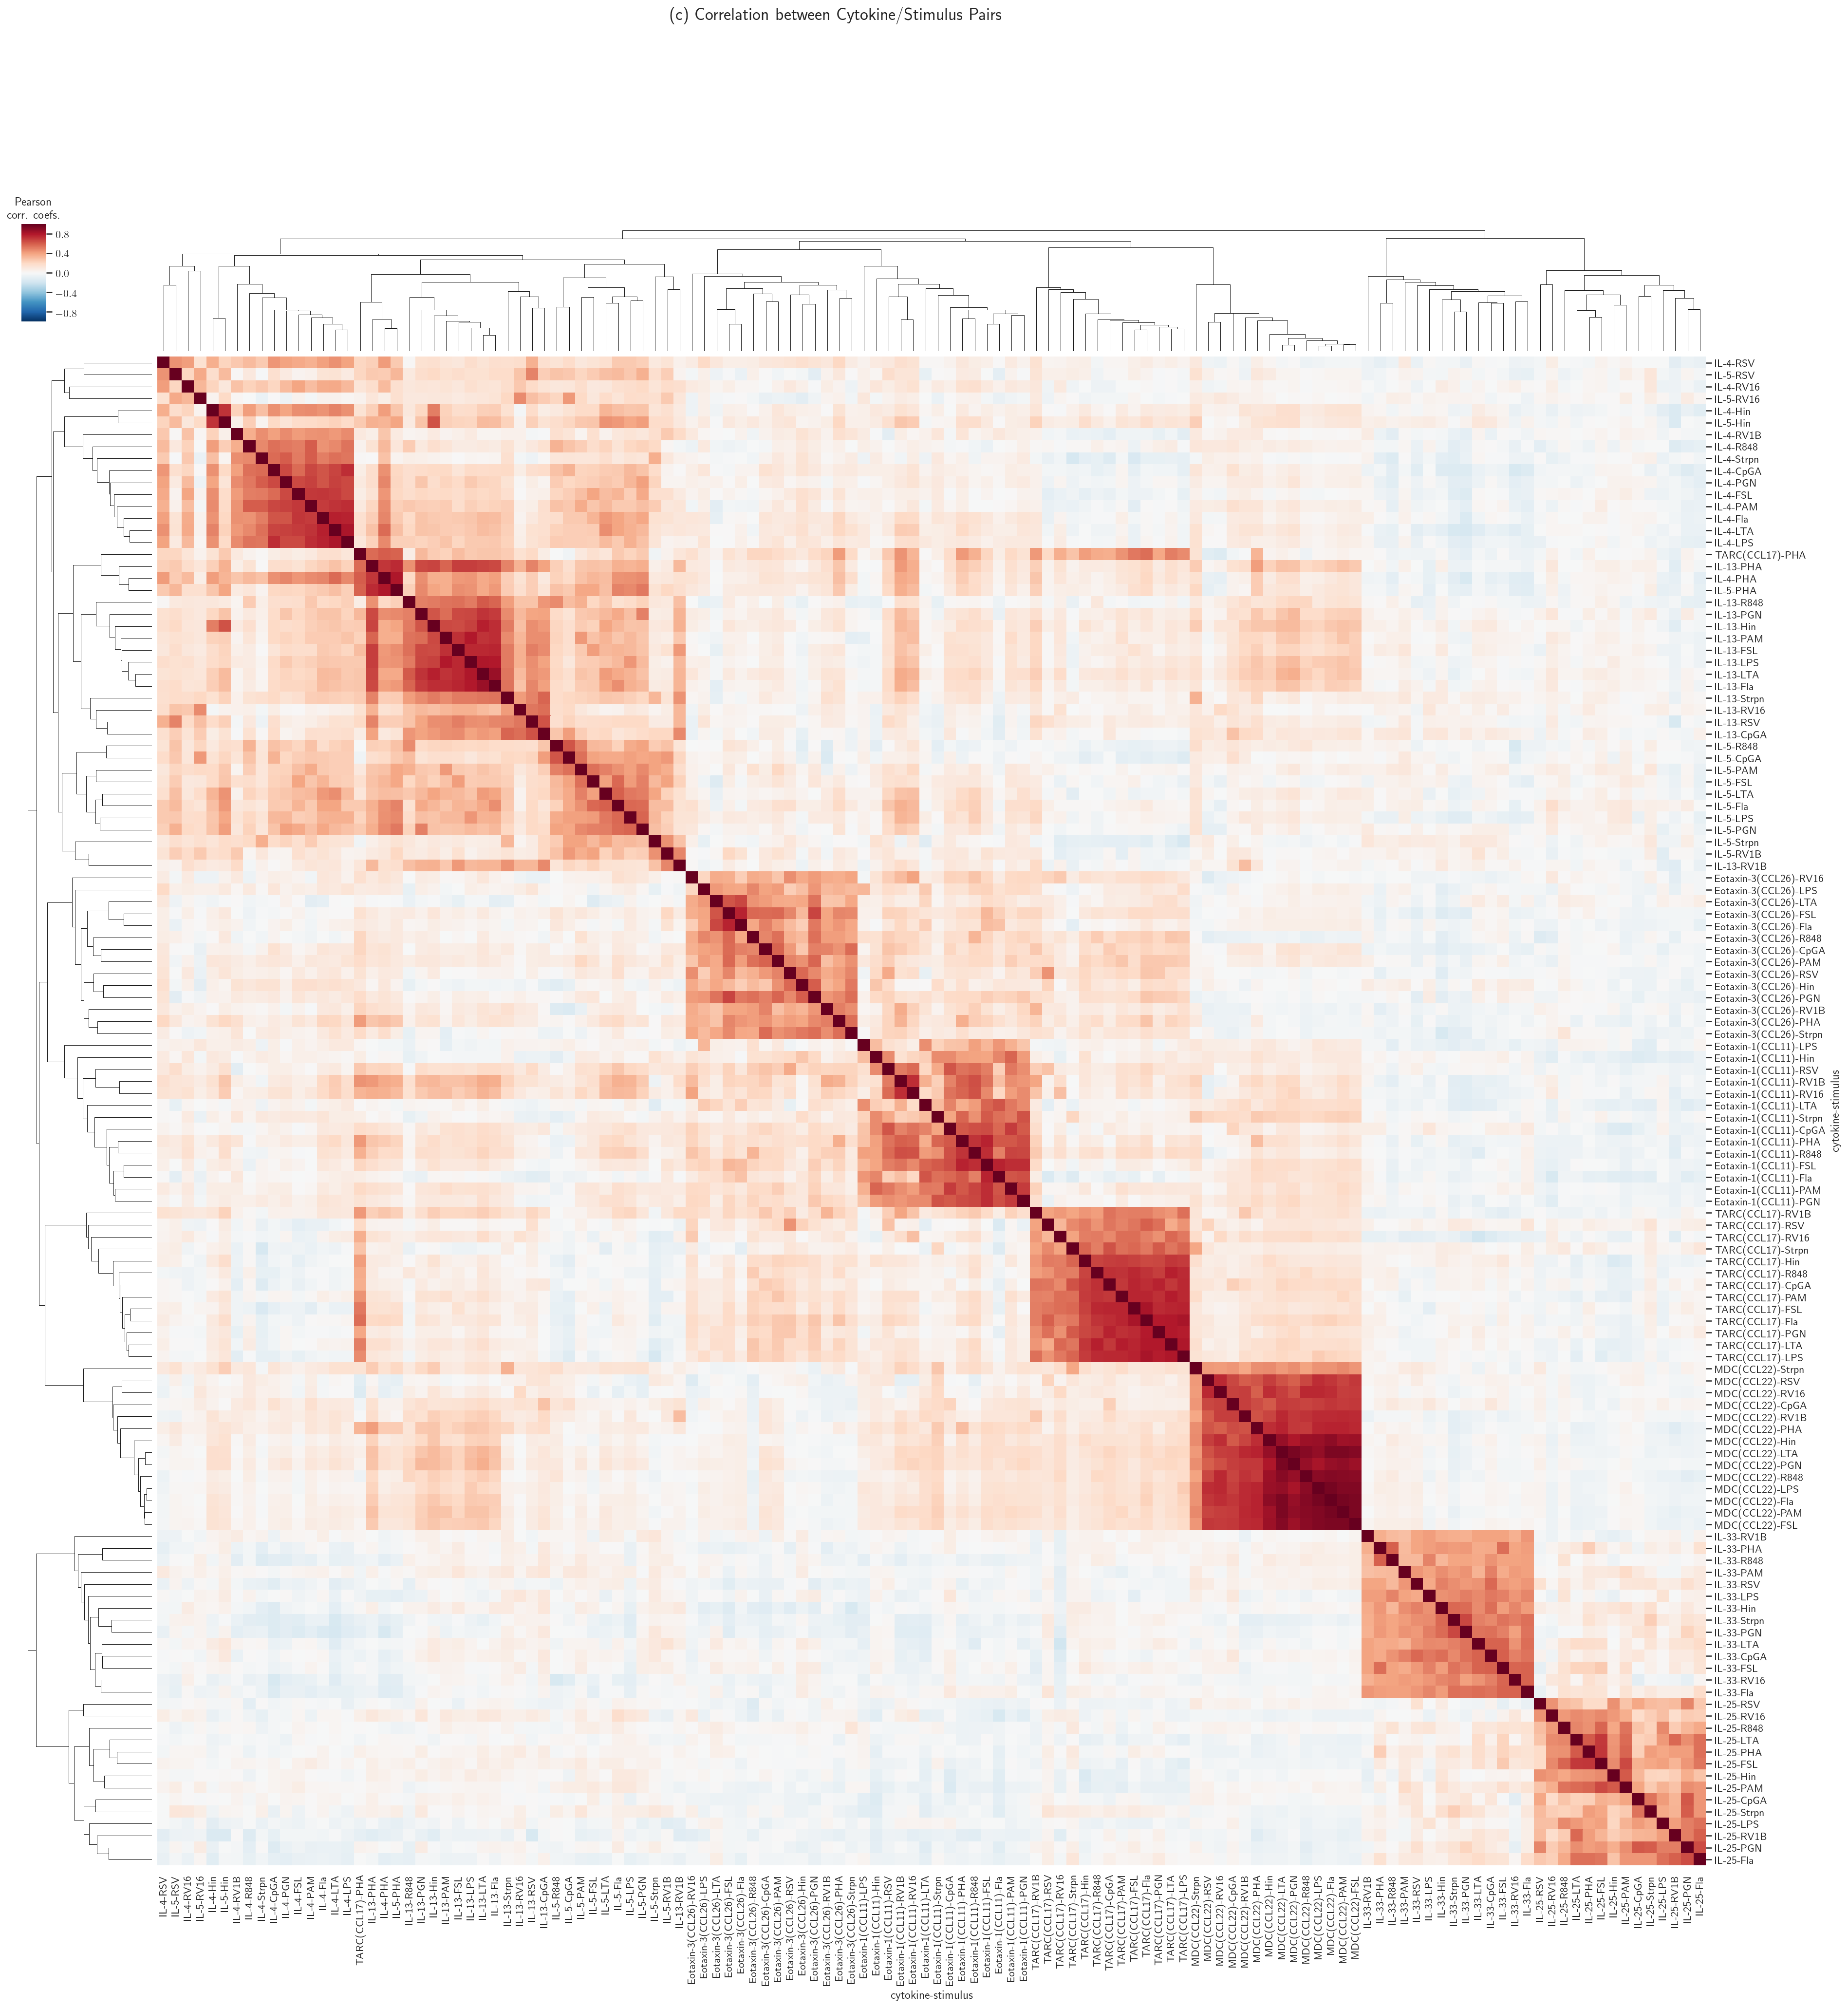

In [52]:
from itertools import cycle,product
from sklearn.preprocessing import scale

df = datapanel_nrm.swapaxes(0,2).to_frame(filter_observations=False)  # get a wide dataframe: sample X (cytokine-stimuli)
scale(df,axis = 1, with_mean=False,with_std=False,copy=False)
df = df.unstack()
df.columns = df.columns.swaplevel(0,1)

for cy_gp in ['Th2/proTh2',]:#[ 'Anti-Viral','Th2/proTh2', 'Pro-inflammatory','Th1']:
    if cy_gp == 'Pro-inflammatory':
#         st_gp = 'Bacterial'
        prefix = 'AllStimFigure4c'
    elif cy_gp == 'Anti-Viral':
        prefix = 'AllStimFigure5c'
#         st_gp = 'Viral'
    elif cy_gp == 'Th1':
        prefix = 'AllStimFigureS9c'
#         st_gp = 'All'
    elif cy_gp == 'Th2/proTh2':
        prefix = 'AllStimFigureS10c'
#         st_gp = 'Bacterial'
    
    st_gp = 'All'
    print(cy_gp)
    C = CytoDict[cy_gp]
    S = StimDict[st_gp]
    pairs = [i for i in product(C,S)]

    df_totest = df.loc[:,pairs]
    
    Y_mat,link = my_dist(df_totest,dist='correlation',sm_with_mean=False,sm_with_std=False)
    
    fs = np.max([8,np.int(16/64.0*df_totest.shape[1])])
    coeff = 1-Y_mat
    if (coeff<0).any().any():
        cmap = plt.get_cmap('RdBu_r')
        vmin = -1
        vmax = 1
    else: 
        cmap = sns.cubehelix_palette(light=1, as_cmap=True)
        vmin = None
        vmax = 1

    
    clm = sns.clustermap(coeff,figsize=(fs,fs), cmap = cmap, vmin=vmin, vmax=vmax,
                         row_linkage=link,col_linkage=link)
#     xlabels = [item.get_text() for item in clm.ax_heatmap.get_xticklabels()]
#     ylabels = [item.get_text() for item in clm.ax_heatmap.get_yticklabels()]
#     rowind = clm.dendrogram_row.reordered_ind
#     colind = clm.dendrogram_col.reordered_ind

    
#     ylbl = clm.ax_heatmap.get_yticklabels()
#     _=clm.ax_heatmap.set_yticklabels(ylbl,rotation=0)
    clm.cax.set_title('Pearson \n corr. coefs.')
    
    
    suptitle = '(c) Correlation between Cytokine/Stimulus Pairs'
    plt.suptitle(suptitle,fontname = "Gill Sans MT Bold",fontsize=18)
    fname = prefix + cy_gp.replace('/','_') + '_correlation_'+st_gp.replace('/','_')+'_noScale.pdf'
    clm.savefig(OutputDir + fname,bbox_inches='tight')



Strong Anti-Viral


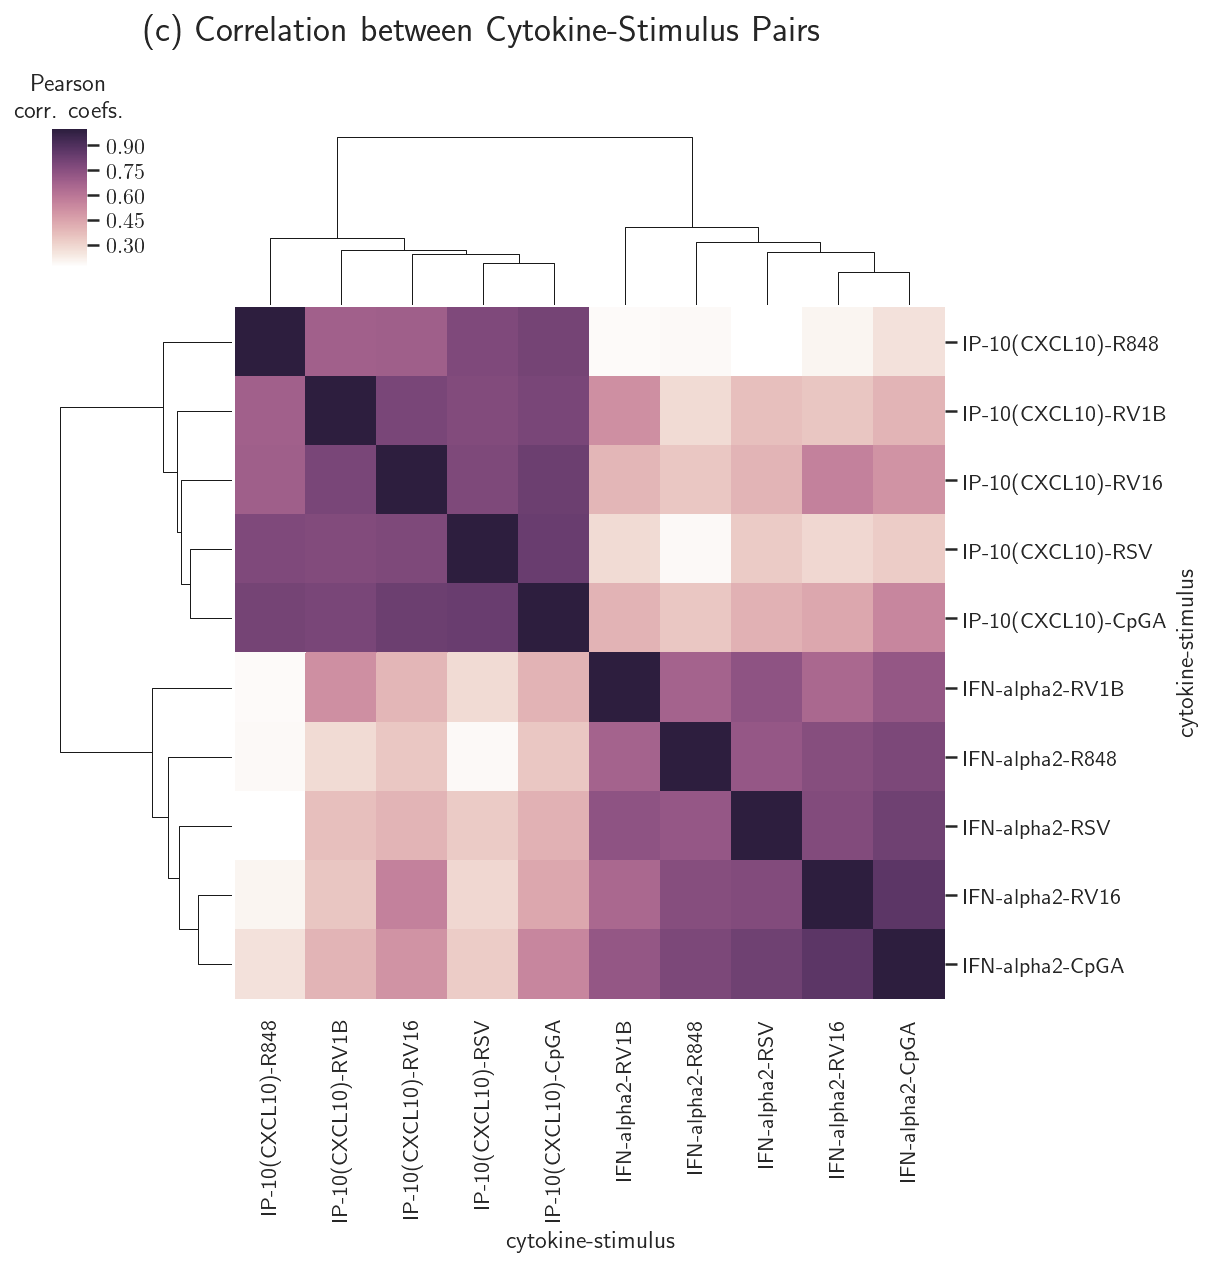

In [53]:
from itertools import cycle,product
from sklearn.preprocessing import scale

df = datapanel_nrm.swapaxes(0,2).to_frame(filter_observations=False)  # get a wide dataframe: sample X (cytokine-stimuli)
scale(df,axis = 1, with_mean=False,with_std=False,copy=False)
df = df.unstack()
df.columns = df.columns.swaplevel(0,1)

for cy_gp in ['Strong Anti-Viral']:#[ 'Strong Anti-Viral','Strong Th2/proTh2', 'Strong Pro-inflammatory','Strong Th1']:
    if cy_gp == 'Strong Pro-inflammatory':
        st_gp = 'Bacterial'
        prefix = 'Figure4c'
    elif cy_gp == 'Strong Anti-Viral':
        prefix = 'Figure5c'
        st_gp =  'Viral'
    elif cy_gp == 'Strong Th1':
        prefix = 'FigureS9c'
        st_gp = 'All'
    elif cy_gp == 'Strong Th2/proTh2':
        prefix = 'FigureS10c'
        st_gp = 'BacterialPHA'
    print(cy_gp) 
    C = CytoDict[cy_gp]
    S = StimDict[st_gp]
    pairs = [i for i in product(C,S)]

    df_totest = df.loc[:,pairs]
    
    Y_mat,link = my_dist(df_totest,dist='correlation',sm_with_mean=False,sm_with_std=False)
    
    fs = np.max([8,np.int(16/64.0*df_totest.shape[1])])
    coeff = 1-Y_mat
    if (coeff<0).any().any():
        cmap = plt.get_cmap('RdBu_r')
        vmin = -1
        vmax = 1
    else: 
        cmap = sns.cubehelix_palette(light=1, as_cmap=True)
        vmin = None
        vmax = 1
    clm = sns.clustermap(coeff,figsize=(fs,fs), cmap = cmap, vmin=vmin, vmax=vmax,
                         row_linkage=link,col_linkage=link)
    ylbl = clm.ax_heatmap.get_yticklabels()
    _=clm.ax_heatmap.set_yticklabels(ylbl,rotation=0)
    clm.cax.set_title('Pearson \n corr. coefs.')
    
    
    suptitle = '(c) Correlation between Cytokine-Stimulus Pairs'
    plt.suptitle(suptitle,fontname = "Gill Sans MT Bold",fontsize=18)
    fname = prefix + cy_gp.replace('/','_') + '_correlation_'+st_gp.replace('/','_')+'_noScale.pdf'
    clm.savefig(OutputDir + fname,bbox_inches='tight')



# Figure 6, S13: GWAS

In [7]:

sheetnames = ['rs8028121',
    'rs111481643',
    'rs117007889',
    'rs139089467',
    'rs77609006',
    'rs73624755',
    'chr7_67342638_D',
    'rs7440580',
    'chr2_221028028_I']

In [8]:
rs_dict = pd.read_excel('data/BacterialStimuliAnnotate21July2017_All.xlsx',
                        usecols='F,M,P',sheet_name=sheetnames)


## Generate single panel Figure 6

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


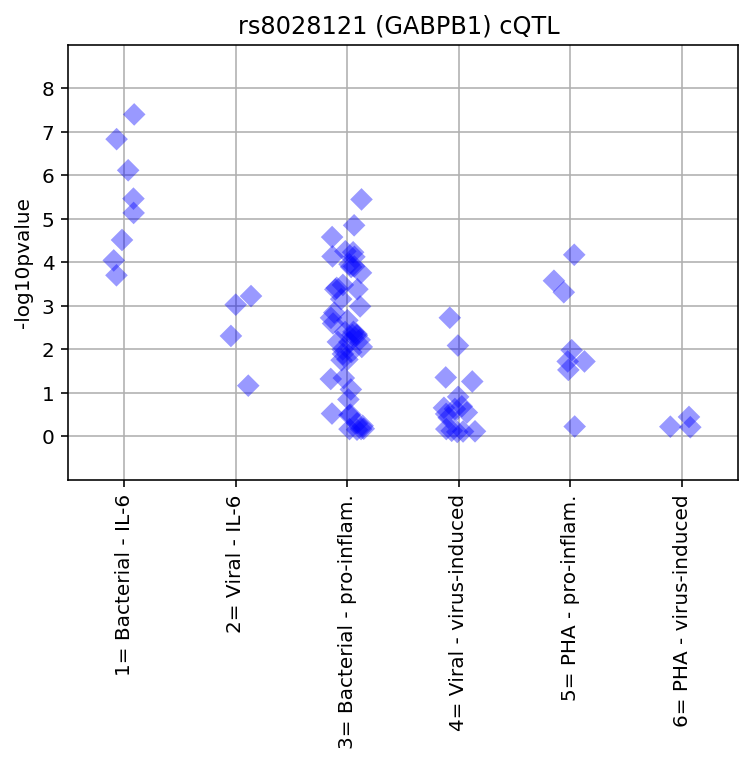

In [7]:
rs = 'rs8028121'
sheet = 'rs8028121'
df_rs = rs_dict[sheet]
sym = 'GABPB1'
x_ticklabels = [
'1= Bacterial - IL-6',
'2= Bacterial - pro-inflam.',
'3= Viral - IL-6',
'4= Viral - virus-induced',
'5= PHA - pro-inflam.',
'6= PHA - virus-induced']

np.random.seed(1234)

fig,ax = plt.subplots(1,1,figsize=(6,4))

sns.stripplot(data = df_rs,x = 'TypeNumeric',y = '-log10pvalue', color ='blue',
              size = 8, jitter = .15,alpha=.4,marker = "D",ax=ax)
ax.set_xlabel('')


ax.grid('on')
ax.set_title(rs + ' (' + sym + ')' + ' cQTL ')
ax.set_ylim((-1,9))
ax.set_yticks(range(0,9))

_=ax.set_xticklabels(x_ticklabels,rotation=90)


savefig(OutputDir + 'Fig6.pdf', bbox_inches='tight')




/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


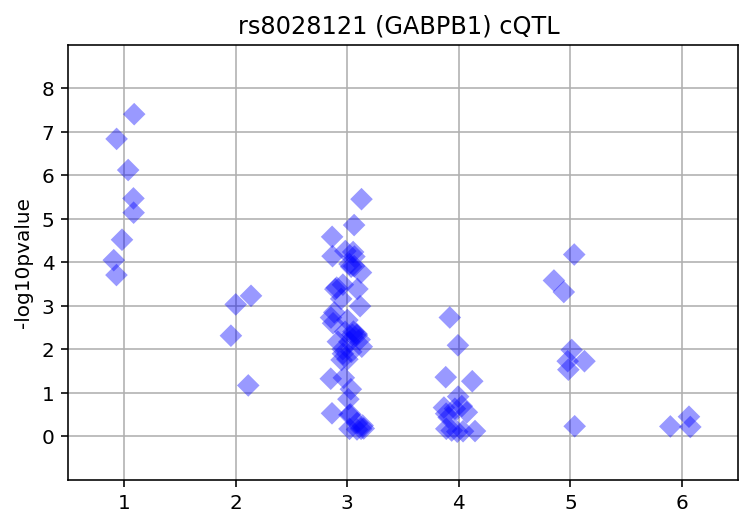

In [10]:
rs = 'rs8028121'
sheet = 'rs8028121'
df_rs = rs_dict[sheet]
sym = 'GABPB1'

np.random.seed(1234)

fig,ax = plt.subplots(1,1,figsize=(6,4))

sns.stripplot(data = df_rs,x = 'TypeNumeric',y = '-log10pvalue', color ='blue',
              size = 8, jitter = .15,alpha=.4,marker = "D",ax=ax)
ax.set_xlabel('')


ax.grid('on')
ax.set_title(rs + ' (' + sym + ')' + ' cQTL ')
ax.set_ylim((-1,9))
ax.set_yticks(range(0,9))

x_ticklabels = [str(i) for i in range(1,7)]

_=ax.set_xticklabels(x_ticklabels)


savefig(OutputDir + 'Fig6_newX.pdf', bbox_inches='tight')




## Generate multiple panel Figure S13

In [11]:
# rslist = ['rs8028121',
#     'rs111481643',
#     'rs117007889',
#     'rs139089467',
#     'rs77609006',
#     'rs73624755',
#     'chr7:67342638:D',
#     'rs7440580',
#     'chr2:221028028:I']
rslist = ['rs139089467',
    'chr2:221028028:I',
    'rs8028121',
    'rs111481643',
    'rs117007889',
    'rs77609006',
    'rs73624755',
    'chr7:67342638:D',
    'rs7440580']
sheetnames = ['rs139089467',
    'chr2_221028028_I',
    'rs8028121',
    'rs111481643',
    'rs117007889',
    'rs77609006',
    'rs73624755',
    'chr7_67342638_D',
    'rs7440580']

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passi

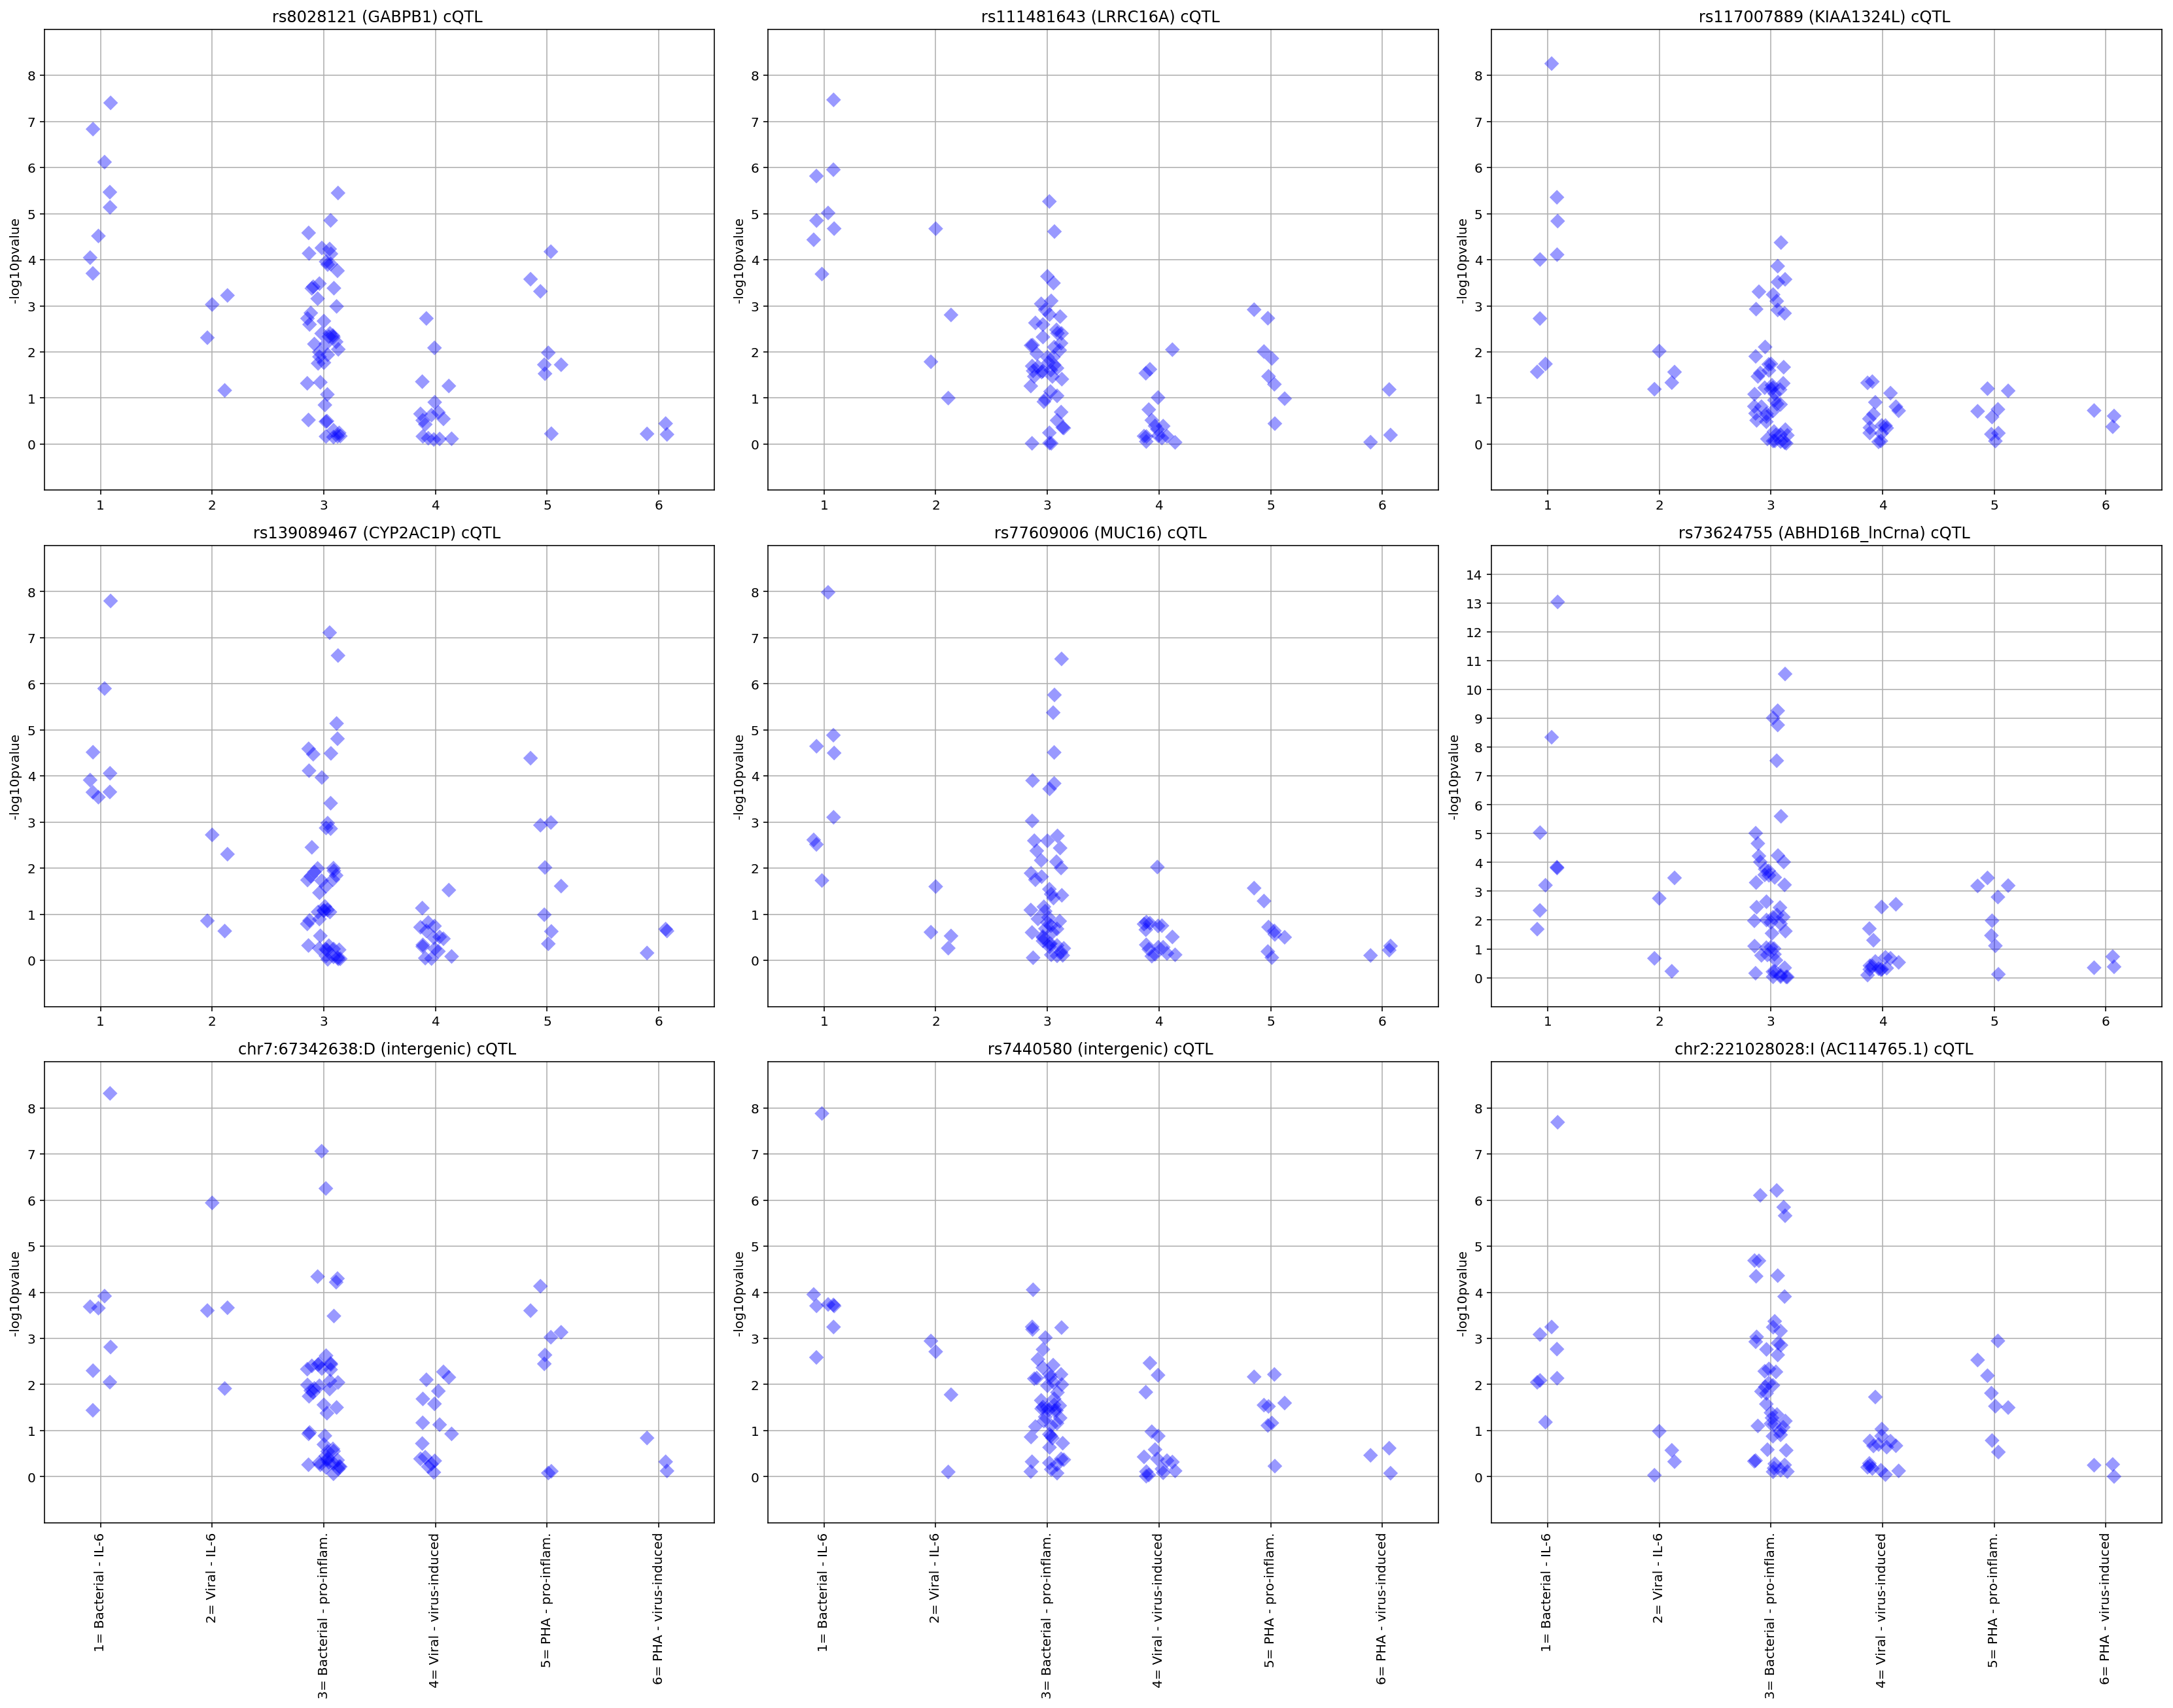

In [11]:
x_ticklabels = [
'1= Bacterial - IL-6',
'2= Viral - IL-6',
'3= Bacterial - pro-inflam.',
'4= Viral - virus-induced',
'5= PHA - pro-inflam.',
'6= PHA - virus-induced']

matplotlib.rcParams['text.usetex'] = False

import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(29,21))
gs = gridspec.GridSpec(3, 3)
gs.update(wspace=0.08,hspace=0.12)

for i,(rs,sheet) in enumerate(zip(rslist,sheetnames)):
    np.random.seed(1234)
    df_rs = rs_dict[sheet]
    sym = df_rs.loc[:,'SYMBOL'][0]
    if sym == 'GABPB1_USP8':
        sym = 'GABPB1'
    if i==0:
        ax = fig.add_subplot(gs[i])
    else:
        ax = fig.add_subplot(gs[i])#,sharey=axold)
    sns.stripplot(data = df_rs,x = 'TypeNumeric',y = '-log10pvalue', color ='blue',
                  size = 8, jitter = .15,alpha=.4,marker = "D",ax=ax)
    ax.set_xlabel('')
    if i== 5:
        ax.set_ylim((-1,15))
        ax.set_yticks(range(0,15))
    else:
        ax.set_ylim((-1,9))
        ax.set_yticks(range(0,9))
    ax.grid('on')
    ax.set_title(rs + ' (' + sym + ')' + ' cQTL ')
    if i in [6,7,8]:
        _=ax.set_xticklabels(x_ticklabels,rotation=90)
    axold = ax
savefig(OutputDir + 'FigS13_' + 'all' + 'lanscape.pdf', bbox_inches='tight')



In [16]:
# rslist = ['rs8028121',
#     'rs111481643',
#     'rs117007889',
#     'rs139089467',
#     'rs77609006',
#     'rs73624755',
#     'chr7:67342638:D',
#     'rs7440580',
#     'chr2:221028028:I']
rslist = ['rs139089467',
    'chr2:221028028:I',
    'rs8028121',
    'rs111481643',
    'rs117007889',
    'rs77609006',
    'rs73624755',
    'chr7:67342638:D',
    'rs7440580']
sheetnames = ['rs139089467',
    'chr2_221028028_I',
    'rs8028121',
    'rs111481643',
    'rs117007889',
    'rs77609006',
    'rs73624755',
    'chr7_67342638_D',
    'rs7440580']

In [22]:
df_rs = rs_dict[sheetnames[1]]

In [23]:
df_rs.head()

TypeNumeric      SYMBOL  -log10pvalue
0            3  AC114765.1      1.348851
1            3  AC114765.1      2.897261
2            3  AC114765.1      1.806839
3            3  AC114765.1      1.982432
4            3  AC114765.1      1.387495

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passi

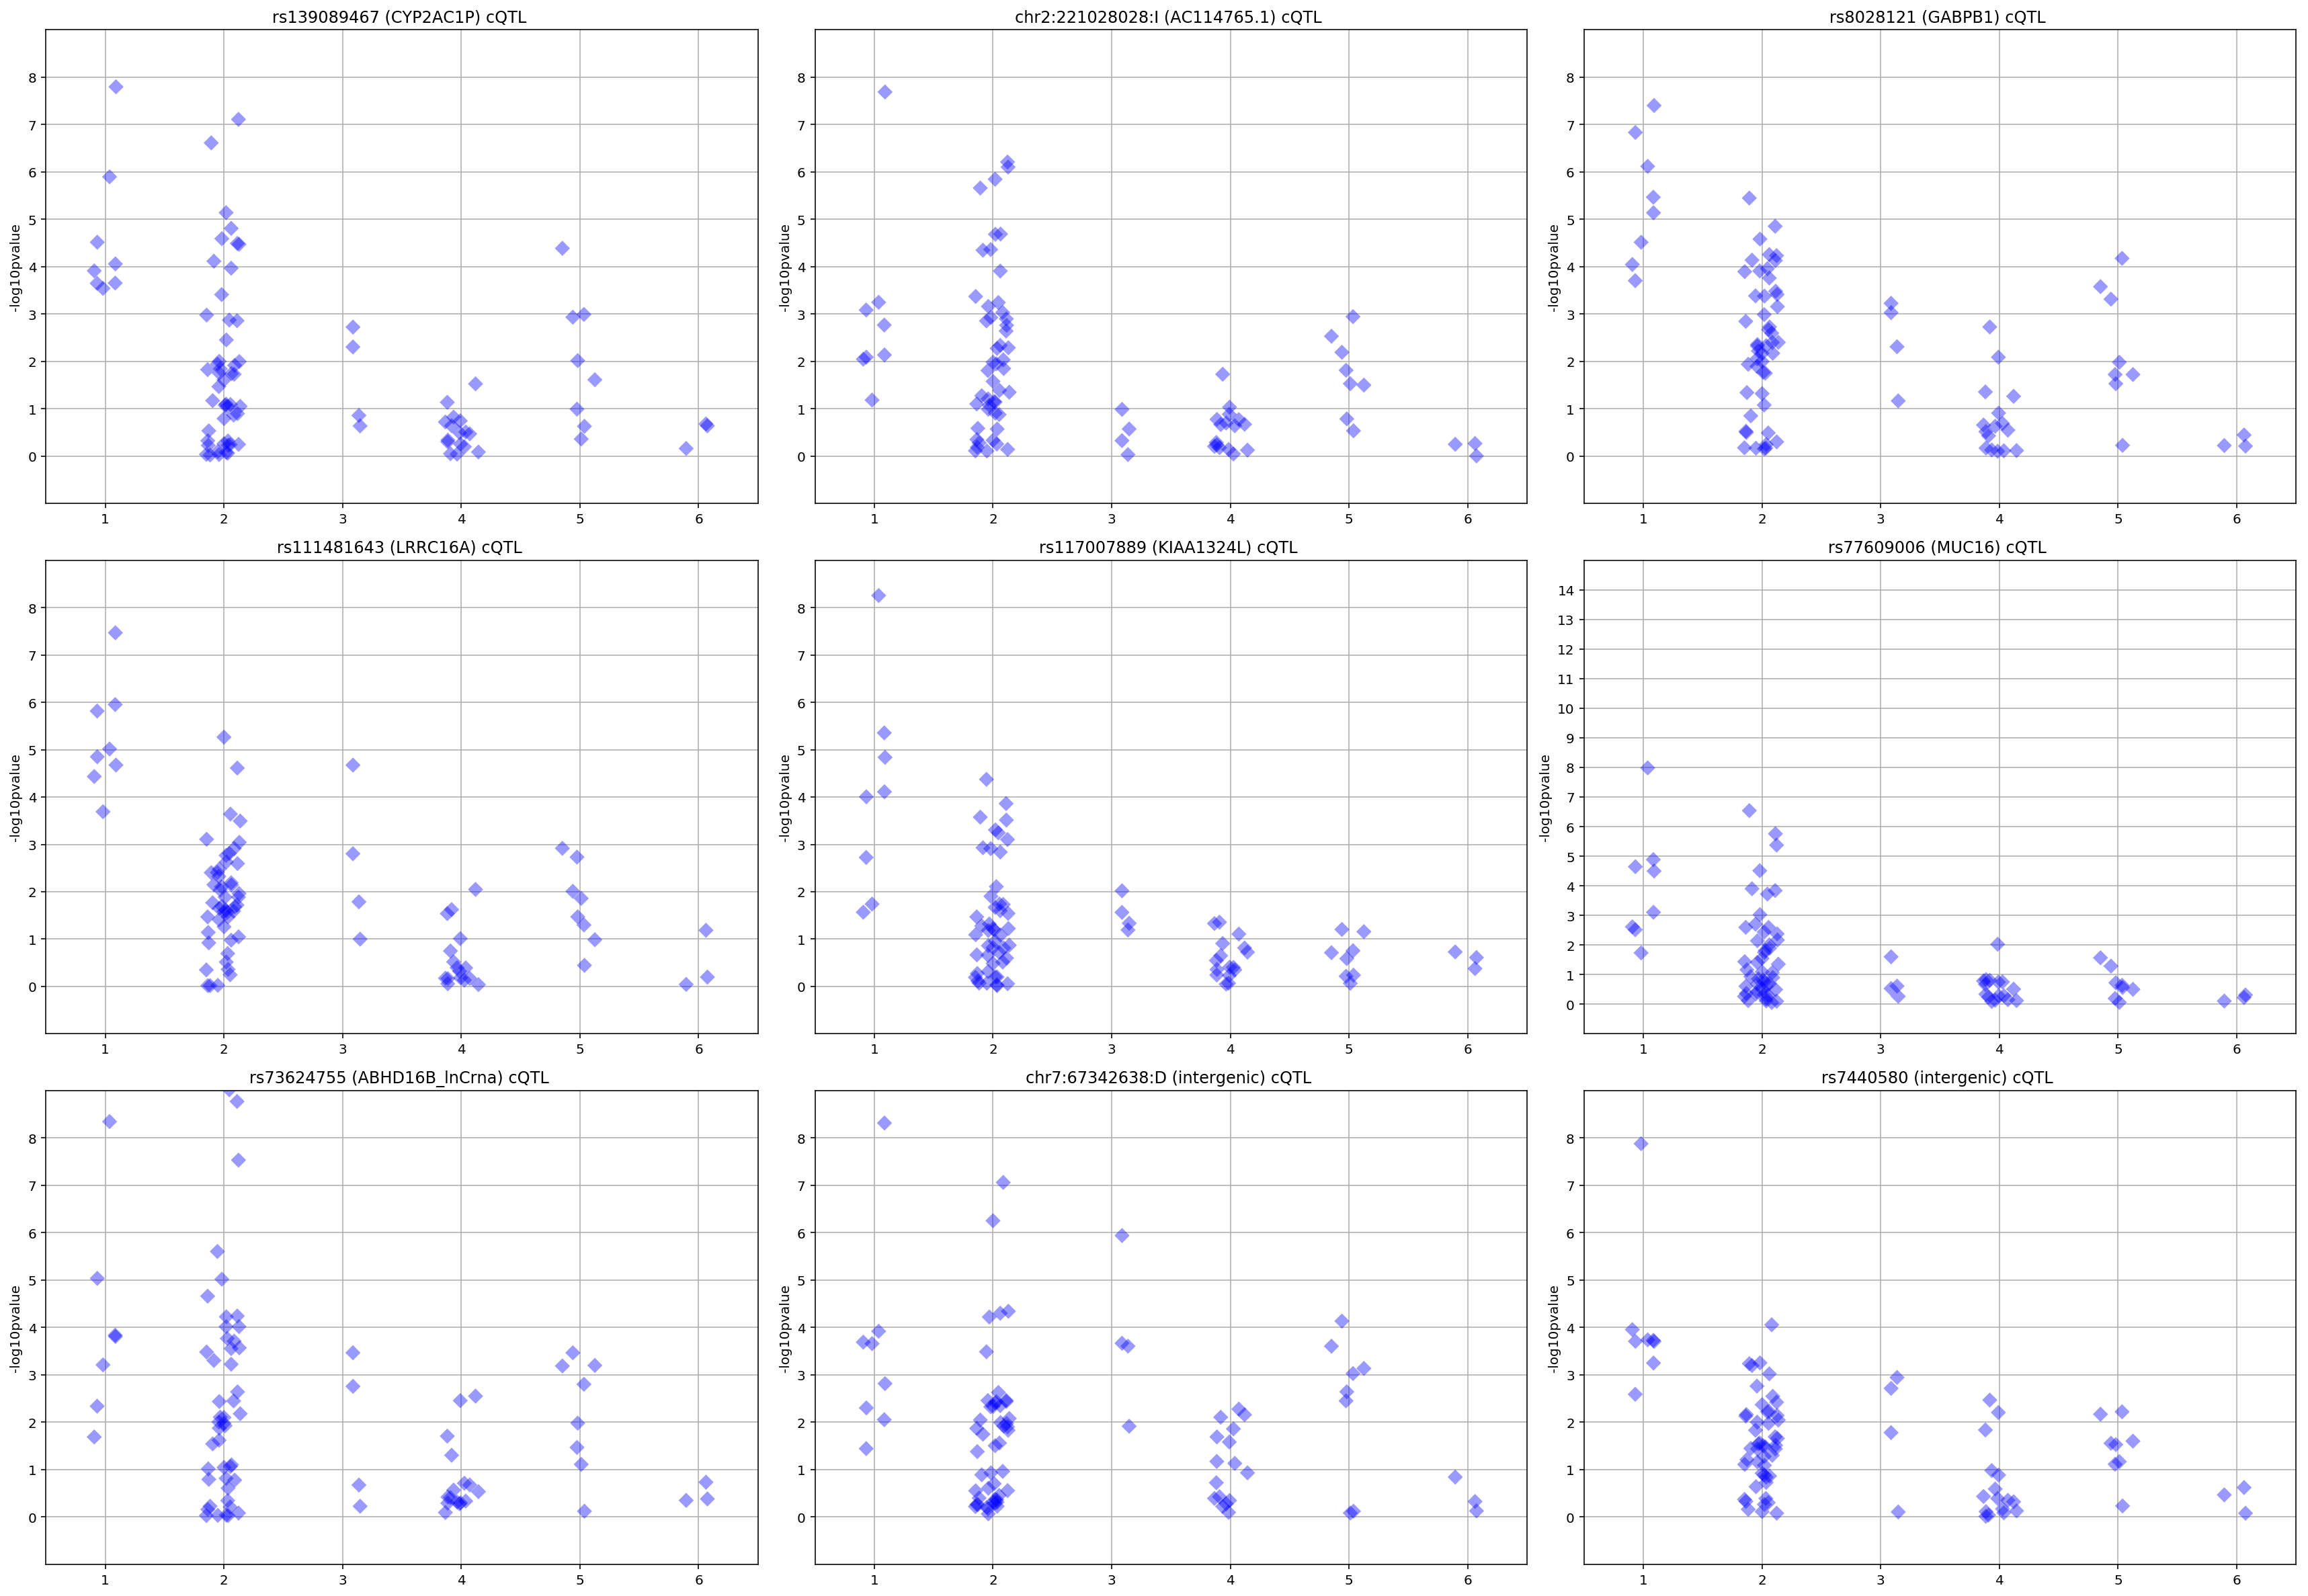

In [32]:
x_ticklabels = [
'1= Bacterial - IL-6',
# '2= Viral - IL-6',
# '3= Bacterial - pro-inflam.',
'2= Bacterial - pro-inflam.',
'3= Viral - IL-6',
'4= Viral - virus-induced',
'5= PHA - pro-inflam.',
'6= PHA - virus-induced']

matplotlib.rcParams['text.usetex'] = False

import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(30,21))
gs = gridspec.GridSpec(3, 3)
gs.update(wspace=0.08,hspace=0.12)

for i,(rs,sheet) in enumerate(zip(rslist,sheetnames)):
    np.random.seed(1234)
    df_rs = rs_dict[sheet]
    sym = df_rs.loc[:,'SYMBOL'][0]
    if sym == 'GABPB1_USP8':
        sym = 'GABPB1'
    if i==0:
        ax = fig.add_subplot(gs[i])
    else:
        ax = fig.add_subplot(gs[i])#,sharey=axold)
    # as requested by John 30 June, swap 2 and 3 in 'TypeNumeric'
    df_rs.loc[:,'TypeNumericNew'] = df_rs.TypeNumeric.apply(lambda x: 5-x if x in [2,3] else x)
    sns.stripplot(data = df_rs,x = 'TypeNumericNew',y = '-log10pvalue', color ='blue',
                  size = 8, jitter = .15,alpha=.4,marker = "D",ax=ax)
    ax.set_xlabel('')
    if i== 5:
        ax.set_ylim((-1,15))
        ax.set_yticks(range(0,15))
    else:
        ax.set_ylim((-1,9))
        ax.set_yticks(range(0,9))
    ax.grid('on')
    ax.set_title(rs + ' (' + sym + ')' + ' cQTL ')
#     if i in [6,7,8]:
#         _=ax.set_xticklabels(x_ticklabels,rotation=90)
    axold = ax
savefig(OutputDir + 'FigS13_' + 'all' + 'lanscapeNewXSwap23.pdf', bbox_inches='tight')



In [15]:

rslist = [#'rs8028121',
    'rs111481643',
    'rs117007889',
    'rs139089467',
    'rs77609006',
    'rs73624755',
    'chr7:67342638:D',
    'rs7440580',
    'chr2:221028028:I']
sheetnames = [#'rs8028121',
    'rs111481643',
    'rs117007889',
    'rs139089467',
    'rs77609006',
    'rs73624755',
    'chr7_67342638_D',
    'rs7440580',
    'chr2_221028028_I']

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passi

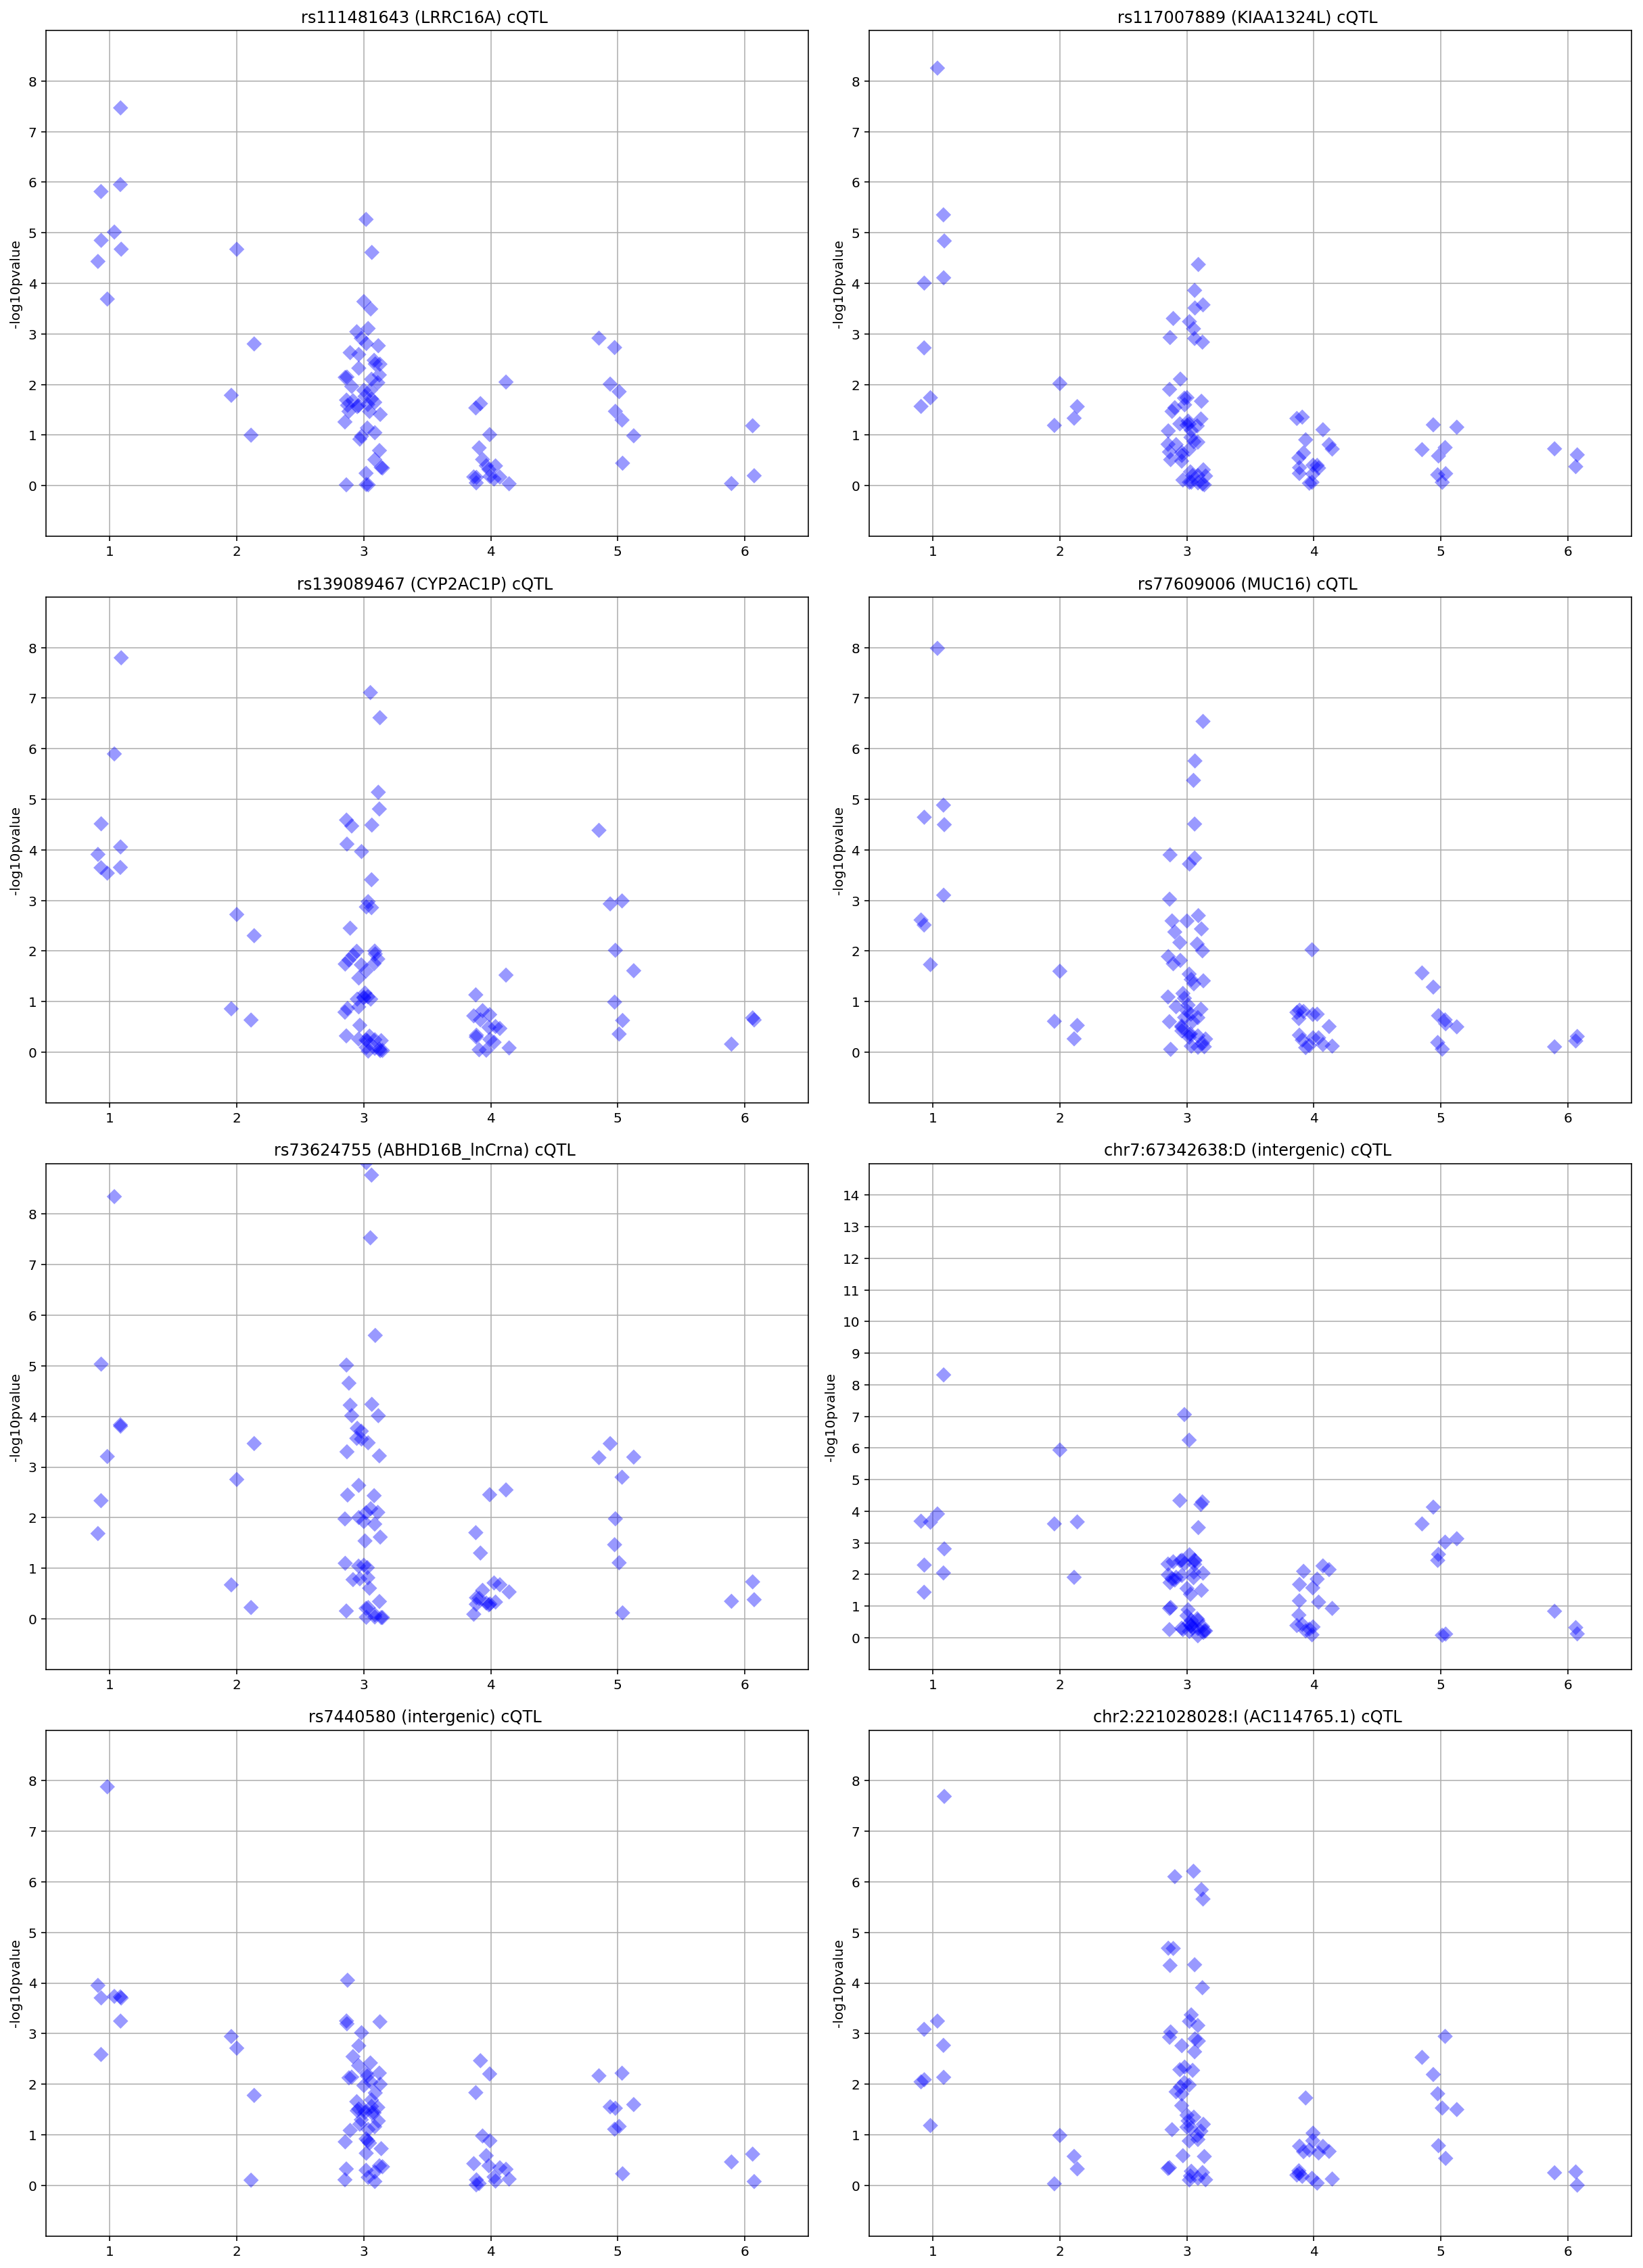

In [16]:
x_ticklabels = [
'1= Bacterial - IL-6',
'2= Viral - IL-6',
'3= Bacterial - pro-inflam.',
'4= Viral - virus-induced',
'5= PHA - pro-inflam.',
'6= PHA - virus-induced']

matplotlib.rcParams['text.usetex'] = False

import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(21,30))
gs = gridspec.GridSpec(4, 2)
gs.update(wspace=0.08,hspace=0.12)

for i,(rs,sheet) in enumerate(zip(rslist,sheetnames)):
    np.random.seed(1234)
    df_rs = rs_dict[sheet]
    sym = df_rs.loc[:,'SYMBOL'][0]
    if sym == 'GABPB1_USP8':
        sym = 'GABPB1'
    if i==0:
        ax = fig.add_subplot(gs[i])
    else:
        ax = fig.add_subplot(gs[i])#,sharey=axold)
    sns.stripplot(data = df_rs,x = 'TypeNumeric',y = '-log10pvalue', color ='blue',
                  size = 8, jitter = .15,alpha=.4,marker = "D",ax=ax)
    ax.set_xlabel('')
    if i== 5:
        ax.set_ylim((-1,15))
        ax.set_yticks(range(0,15))
    else:
        ax.set_ylim((-1,9))
        ax.set_yticks(range(0,9))
    ax.grid('on')
    ax.set_title(rs + ' (' + sym + ')' + ' cQTL ')
#     if i in [6,7,8]:
#         _=ax.set_xticklabels(x_ticklabels,rotation=90)   
    axold = ax
savefig(OutputDir + 'FigS7_' + '4by2' + 'NewX.pdf', bbox_inches='tight')

